# Indian Startup Ecosystem Analysis

## Introduction

#### We seek to analyse funding received by startups in India. The aim is to prescribe the best course of action for a startup looking into the Indian business ecosystem. Our first step will be to gain business understanding of the problem.

## Business Understanding

#### Questions

##### 1. Which company received the most funding?
##### 2. Which company received the least funding?
##### 3. Which Sector received the highest amount of funding?
##### 4. Which Sector received the lowest amount of funding?
##### 5. Which Headquarters recorded the highest amount of funding?
##### 6. What was the total amount funding received each year?
##### 7. What was the average amount of funding received in 2019, 2020 and 2021
##### 8. At what stage did startups receive the most funding?
##### 9. Did the location affect the amount of funding received?

## Hypothesis

#### NULL :  Industries in the Technology sector do not have a higher success rate of getting funding

#### ALTERNATE : Industries in the Technology sector have a higher success rate of getting funding


## Import necessary libraries


In [1]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Data Loading


##### Here is the section to load the datasets  and the additional files



In [2]:
df21= pd.read_csv("India Startup Funding/startup_funding2021.csv")
df20= pd.read_csv("India Startup Funding/startup_funding2020.csv")
df19= pd.read_csv("India Startup Funding/startup_funding2019.csv")
df18 = pd.read_csv("India Startup Funding/startup_funding2018.csv")


## Exploratory Data Analysis: EDA

### Cleaning 2021 dataset

In [3]:
df21.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",NaN
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


In [4]:
# Check the number of rows and colunms in the 2021 dataset
df21.shape

(1209, 9)

In [5]:
df21.describe()

,Founded
count,1208.000000
mean,2016.655629
std,4.517364
min,1963.000000
25%,2015.000000
50%,2018.000000
75%,2020.000000
max,2021.000000


In [6]:
df21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What it does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount($)      1206 non-null   object 
 8   Stage          781 non-null    object 
dtypes: float64(1), object(8)
memory usage: 85.1+ KB


###  Inspect each column of the data set to clean thoroughly 

#### The Company/Brand column

In [7]:
# Find the unique values
df21['Company/Brand'].unique()

array(['Unbox Robotics', 'upGrad', 'Lead School', ..., 'Gigforce',
       'Vahdam', 'WeRize'], dtype=object)

In [8]:
# Find missing values
df21['Company/Brand'].isna().sum()

0

#### The Founded column

In [9]:
# Find the unique values 
df20['Founded'].unique()

array(['2019', '2018', '2020', '2016', '2008', '2015', '2017', '2014',
       '1998', '2007', '2011', '1982', '2013', '2009', '2012', '1995',
       '2010', '2006', '1978', nan, '1999', '1994', '2005', '1973', '-',
       '2002', '2004', '2001'], dtype=object)

In [10]:
# Total Number of empty rows in the Founded Column 
df21['Founded'].isnull().sum()

1

In [11]:
# Extracting the row(s) with  missing data in the Founded column
df21[df21['Founded'].isna()]


,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
137,Smart Express,NaN,Mumbai,Logistics,India’s Most Innovative and Awarded Express Lo...,Yogesh Dhingra,"IIFL India Private Equity Fund, Smiti Holding ...",$10000000,Seed


In [12]:
# replace NaN with np.nan

df21["Founded"].replace("nan", np.nan, inplace = True, regex=True)

#Change the datatype of Founded column from Float to int first to remove the decimal
# fill NaN rows with 0
df21['Founded'] = df21['Founded'].replace(np.nan, 0)
df21['Founded'] = df21['Founded'].astype(int)
df21['Founded']

0       2019
1       2015
2       2012
3       2015
4       2021
        ... 
1204    2019
1205    2015
1206    2019
1207    2015
1208    2019
Name: Founded, Length: 1209, dtype: int64

#### The HeadQuaters column 

In [13]:
# Find the unique values
df21['HeadQuarter'].unique()

array(['Bangalore', 'Mumbai', 'Gurugram', 'New Delhi', 'Hyderabad',
       'Jaipur', 'Ahmadabad', 'Chennai', nan,
       'Small Towns, Andhra Pradesh', 'Goa', 'Rajsamand', 'Ranchi',
       'Faridabad, Haryana', 'Gujarat', 'Pune', 'Thane', 'Computer Games',
       'Cochin', 'Noida', 'Chandigarh', 'Gurgaon', 'Vadodara',
       'Food & Beverages', 'Pharmaceuticals\t#REF!', 'Gurugram\t#REF!',
       'Kolkata', 'Ahmedabad', 'Mohali', 'Haryana', 'Indore', 'Powai',
       'Ghaziabad', 'Nagpur', 'West Bengal', 'Patna', 'Samsitpur',
       'Lucknow', 'Telangana', 'Silvassa', 'Thiruvananthapuram',
       'Faridabad', 'Roorkee', 'Ambernath', 'Panchkula', 'Surat',
       'Coimbatore', 'Andheri', 'Mangalore', 'Telugana', 'Bhubaneswar',
       'Kottayam', 'Beijing', 'Panaji', 'Satara', 'Orissia', 'Jodhpur',
       'New York', 'Santra', 'Mountain View, CA', 'Trivandrum',
       'Jharkhand', 'Kanpur', 'Bhilwara', 'Guwahati',
       'Online Media\t#REF!', 'Kochi', 'London',
       'Information Technolo

In [14]:
# Remove t#REF!from names in headquarters

df21['HeadQuarter'] = df21['HeadQuarter'].replace({'\t#REF!': ''}, regex=True)
df21['HeadQuarter'].unique()

array(['Bangalore', 'Mumbai', 'Gurugram', 'New Delhi', 'Hyderabad',
       'Jaipur', 'Ahmadabad', 'Chennai', nan,
       'Small Towns, Andhra Pradesh', 'Goa', 'Rajsamand', 'Ranchi',
       'Faridabad, Haryana', 'Gujarat', 'Pune', 'Thane', 'Computer Games',
       'Cochin', 'Noida', 'Chandigarh', 'Gurgaon', 'Vadodara',
       'Food & Beverages', 'Pharmaceuticals', 'Kolkata', 'Ahmedabad',
       'Mohali', 'Haryana', 'Indore', 'Powai', 'Ghaziabad', 'Nagpur',
       'West Bengal', 'Patna', 'Samsitpur', 'Lucknow', 'Telangana',
       'Silvassa', 'Thiruvananthapuram', 'Faridabad', 'Roorkee',
       'Ambernath', 'Panchkula', 'Surat', 'Coimbatore', 'Andheri',
       'Mangalore', 'Telugana', 'Bhubaneswar', 'Kottayam', 'Beijing',
       'Panaji', 'Satara', 'Orissia', 'Jodhpur', 'New York', 'Santra',
       'Mountain View, CA', 'Trivandrum', 'Jharkhand', 'Kanpur',
       'Bhilwara', 'Guwahati', 'Online Media', 'Kochi', 'London',
       'Information Technology & Services', 'The Nilgiris', 'Gandhin

In [15]:
# From our unique function, we see that food and beverages, pharmaceuticals and Information Technology & Services
# are in our headquarter column. Lets extract them 

df21[df21['HeadQuarter'].str.contains('Information Technology & Services|Online Media|Pharmaceuticals|Food & Beverages|Computer Games',case=False, na=False)]


,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
98,FanPlay,2020,Computer Games,Computer Games,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",Upsparks,$1200000
111,FanPlay,2020,Computer Games,Computer Games,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",Upsparks,$1200000
241,MasterChow,2020,Food & Beverages,Hauz Khas,A ready-to-cook Asian cuisine brand,"Vidur Kataria, Sidhanth Madan",WEH Ventures,$461000,Seed
242,Fullife Healthcare,2009,Pharmaceuticals,Primary Business is Development and Manufactur...,Varun Khanna,Morgan Stanley Private Equity Asia,$22000000,Series C,NaN
255,MasterChow,2020,Food & Beverages,Hauz Khas,A ready-to-cook Asian cuisine brand,"Vidur Kataria, Sidhanth Madan",WEH Ventures,$461000,Seed
256,Fullife Healthcare,2009,Pharmaceuticals,Primary Business is Development and Manufactur...,Varun Khanna,Morgan Stanley Private Equity Asia,$22000000,Series C,NaN
1100,Sochcast,2020,Online Media,Sochcast is an Audio experiences company that ...,"CA Harvinderjit Singh Bhatia, Garima Surana, A...","Vinners, Raj Nayak, Amritaanshu Agrawal",$Undisclosed,NaN,NaN
1176,Peak,2014,Information Technology & Services,"Manchester, Greater Manchester",Peak helps the world's smartest companies put ...,Atul Sharma,SoftBank Vision Fund 2,$75000000,Series C


In [16]:
# Replace with NaN
df21['HeadQuarter'] = df21['HeadQuarter'].replace(['Pharmaceuticals', 'Computer Games', 'Food & Beverages', 'Online Media', 'Information Technology & Services'], np.nan)
df21["HeadQuarter"].unique()

array(['Bangalore', 'Mumbai', 'Gurugram', 'New Delhi', 'Hyderabad',
       'Jaipur', 'Ahmadabad', 'Chennai', nan,
       'Small Towns, Andhra Pradesh', 'Goa', 'Rajsamand', 'Ranchi',
       'Faridabad, Haryana', 'Gujarat', 'Pune', 'Thane', 'Cochin',
       'Noida', 'Chandigarh', 'Gurgaon', 'Vadodara', 'Kolkata',
       'Ahmedabad', 'Mohali', 'Haryana', 'Indore', 'Powai', 'Ghaziabad',
       'Nagpur', 'West Bengal', 'Patna', 'Samsitpur', 'Lucknow',
       'Telangana', 'Silvassa', 'Thiruvananthapuram', 'Faridabad',
       'Roorkee', 'Ambernath', 'Panchkula', 'Surat', 'Coimbatore',
       'Andheri', 'Mangalore', 'Telugana', 'Bhubaneswar', 'Kottayam',
       'Beijing', 'Panaji', 'Satara', 'Orissia', 'Jodhpur', 'New York',
       'Santra', 'Mountain View, CA', 'Trivandrum', 'Jharkhand', 'Kanpur',
       'Bhilwara', 'Guwahati', 'Kochi', 'London', 'The Nilgiris',
       'Gandhinagar'], dtype=object)

#### The Stage column 

In [17]:
#Find the unique values
df21['Stage'].unique()

array(['Pre-series A', nan, 'Series D', 'Series C', 'Seed', 'Series B',
       'Series E', 'Pre-seed', 'Series A', 'Pre-series B', 'Debt',
       '$1200000', 'Bridge', 'Seed+', 'Series F2', 'Series A+',
       'Series G', 'Series F', 'Series H', 'Series B3', 'PE', 'Series F1',
       'Pre-series A1', '$300000', 'Early seed', 'Series D1', '$6000000',
       '$1000000', 'Seies A', 'Pre-series', 'Series A2', 'Series I'],
      dtype=object)

In [18]:
# Replace NaN with np.nan
df21["Stage"].replace("nan", np.nan, inplace = True, regex=True)
# Extracting the row with  missing data in the NaN column
df21[df21['Stage'].isna()]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
1,upGrad,2015,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",NaN
5,Urban Company,2014,New Delhi,Home services,Urban Company (Formerly UrbanClap) is a home a...,"Abhiraj Singh Bhal, Raghav Chandra, Varun Khaitan",Vy Capital,"$188,000,000",NaN
6,Comofi Medtech,2018,Bangalore,HealthTech,Comofi Medtech is a healthcare robotics startup.,Gururaj KB,"CIIE.CO, KIIT-TBI","$200,000",NaN
8,Vitra.ai,2020,Bangalore,Tech Startup,Vitra.ai is an AI-based video translation plat...,Akash Nidhi PS,Inflexor Ventures,Undisclosed,NaN
9,Taikee,2010,Mumbai,E-commerce,"Taikee is the ISO-certified, B2B e-commerce pl...","Nidhi Ramachandran, Sachin Chhabra",NaN,"$1,000,000",NaN
...,...,...,...,...,...,...,...,...,...
1172,Peppermint,2019,Pune,Industrial Automation,Intelligent Housekeeping Robots for public and...,"Runal Dahiwade, Miraj C Vora","Venture Catalysts, Indian Angel Network",$600000,NaN
1182,Sugar.fit,2021,Bangalore,Health,"Innovative technology, compassionate diabetes ...","Shivtosh Kumar, Madan Somasundaram","Cure.fit, Endiya Partners, Tanglin Venture",$10000000,NaN
1192,Geniemode,2021,Gurugram,B2B,Transforming global sourcing for retailers & s...,"Amit Sharma, Tanuj Gangwani",Info Edge Ventures,$2000000,NaN
1193,Sapio Analytics,2019,Mumbai,Computer Software,Sapio helps government create policies driven ...,"Hardik Somani, Ashwin Srivastava, Shripal Jain...","Rachit Poddar, Rajesh Gupta",$Undisclosed,NaN


In [19]:
# the Stage contains some amounts. Extract the rows with figures in them using the $ sign as our condition . 
df21[df21['Stage'].str.contains('\$', na=False)]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
98,FanPlay,2020,NaN,Computer Games,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",Upsparks,$1200000
111,FanPlay,2020,NaN,Computer Games,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",Upsparks,$1200000
538,Little Leap,2020,New Delhi,EdTech,Soft Skills that make Smart Leaders,Holistic Development Programs for children in ...,Vishal Gupta,ah! Ventures,$300000
551,BHyve,2020,Mumbai,Human Resources,A Future of Work Platform for diffusing Employ...,Backed by 100x.VC,"Omkar Pandharkame, Ketaki Ogale","ITO Angel Network, LetsVenture",$300000
674,MYRE Capital,2020,Mumbai,Commercial Real Estate,Democratising Real Estate Ownership,Own rent yielding commercial properties,Aryaman Vir,NaN,$6000000
677,Saarthi Pedagogy,2015,Ahmadabad,EdTech,"India's fastest growing Pedagogy company, serv...",Pedagogy,Sushil Agarwal,"JITO Angel Network, LetsVenture",$1000000


In [20]:
# Confirm if there is any row with amount in the Stage column
df21[df21['Stage'].str.contains('\$', na=False)]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
98,FanPlay,2020,NaN,Computer Games,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",Upsparks,$1200000
111,FanPlay,2020,NaN,Computer Games,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",Upsparks,$1200000
538,Little Leap,2020,New Delhi,EdTech,Soft Skills that make Smart Leaders,Holistic Development Programs for children in ...,Vishal Gupta,ah! Ventures,$300000
551,BHyve,2020,Mumbai,Human Resources,A Future of Work Platform for diffusing Employ...,Backed by 100x.VC,"Omkar Pandharkame, Ketaki Ogale","ITO Angel Network, LetsVenture",$300000
674,MYRE Capital,2020,Mumbai,Commercial Real Estate,Democratising Real Estate Ownership,Own rent yielding commercial properties,Aryaman Vir,NaN,$6000000
677,Saarthi Pedagogy,2015,Ahmadabad,EdTech,"India's fastest growing Pedagogy company, serv...",Pedagogy,Sushil Agarwal,"JITO Angel Network, LetsVenture",$1000000


In [21]:
#Remove all amount values with $ sign in the Stage column and put them in the Amount ($) colum
currency = df21['Stage'].str.contains('\$', na=False)
df21.loc[currency, ['Stage', 'Amount($)']] = df21.loc[currency, ['Amount($)', 'Stage']].to_numpy()

In [22]:
#Lets check the column again and make sure the stage column does not have any values with $ sign.
df21[df21['Stage']== '$'].sum()

Company/Brand    0.0
Founded          0.0
HeadQuarter      0.0
Sector           0.0
What it does     0.0
Founders         0.0
Investor         0.0
Amount($)        0.0
Stage            0.0
dtype: float64

In [23]:
# Replace foreign values with NaN
df21['Stage'] = df21['Stage'].replace(["PE", "ah! Ventures", "ITO Angel Network, LetsVenture", "JITO Angel Network, LetsVenture", "Upsparks"], np.nan)


In [24]:
df21['Stage'].unique()

array(['Pre-series A', nan, 'Series D', 'Series C', 'Seed', 'Series B',
       'Series E', 'Pre-seed', 'Series A', 'Pre-series B', 'Debt',
       'Bridge', 'Seed+', 'Series F2', 'Series A+', 'Series G',
       'Series F', 'Series H', 'Series B3', 'Series F1', 'Pre-series A1',
       'Early seed', 'Series D1', 'Seies A', 'Pre-series', 'Series A2',
       'Series I'], dtype=object)

In [25]:
# Replace misspelled stage names with the appropriate stage names 
df21['Stage'] = df21['Stage'].replace({'Seed+':'Seed','Seies A':'Series A'})
df21['Stage'].unique()
                            

array(['Pre-series A', nan, 'Series D', 'Series C', 'Seed', 'Series B',
       'Series E', 'Pre-seed', 'Series A', 'Pre-series B', 'Debt',
       'Bridge', 'Series F2', 'Series A+', 'Series G', 'Series F',
       'Series H', 'Series B3', 'Series F1', 'Pre-series A1',
       'Early seed', 'Series D1', 'Pre-series', 'Series A2', 'Series I'],
      dtype=object)

#### The Sector column 

In [26]:
# Find unique values
df21['Sector'].unique()

array(['AI startup', 'EdTech', 'B2B E-commerce', 'FinTech',
       'Home services', 'HealthTech', 'Tech Startup', 'E-commerce',
       'B2B service', 'Helathcare', 'Renewable Energy', 'Electronics',
       'IT startup', 'Food & Beverages', 'Aeorspace', 'Deep Tech',
       'Dating', 'Gaming', 'Robotics', 'Retail', 'Food', 'Oil and Energy',
       'AgriTech', 'Telecommuncation', 'Milk startup', 'AI Chatbot', 'IT',
       'Logistics', 'Hospitality', 'Fashion', 'Marketing',
       'Transportation', 'LegalTech', 'Food delivery', 'Automotive',
       'SaaS startup', 'Fantasy sports', 'Video communication',
       'Social Media', 'Skill development', 'Rental', 'Recruitment',
       'HealthCare', 'Sports', 'Computer Games', 'Consumer Goods',
       'Information Technology', 'Apparel & Fashion',
       'Logistics & Supply Chain', 'Healthtech', 'Healthcare',
       'SportsTech', 'HRTech', 'Wine & Spirits',
       'Mechanical & Industrial Engineering', 'Spiritual',
       'Financial Services', 'I

In [27]:
# Extract wrong sector value 
df21[df21['Sector'].str.contains('MoEVing is')]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
257,MoEVing,2021,Gurugram,MoEVing is India's only Electric Mobility focu...,"Vikash Mishra, Mragank Jain","Anshuman Maheshwary, Dr Srihari Raju Kalidindi",$5000000,Seed,NaN


In [28]:
# Extract wrong sector value 
df21[df21['Sector'].str.contains('Primary Business is Development and Manufacturing of Novel')]


,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
242,Fullife Healthcare,2009,NaN,Primary Business is Development and Manufactur...,Varun Khanna,Morgan Stanley Private Equity Asia,$22000000,Series C,NaN
256,Fullife Healthcare,2009,NaN,Primary Business is Development and Manufactur...,Varun Khanna,Morgan Stanley Private Equity Asia,$22000000,Series C,NaN


In [29]:
# Extract wrong sector value 
df21[df21['Sector'].str.contains('Sochcast is an Audio experiences company')]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
1100,Sochcast,2020,NaN,Sochcast is an Audio experiences company that ...,"CA Harvinderjit Singh Bhatia, Garima Surana, A...","Vinners, Raj Nayak, Amritaanshu Agrawal",$Undisclosed,NaN,NaN


In [30]:
# Replace the entries with NaN
df21['Sector']= df21['Sector'].replace({'MoEVing is India\'s only Electric Mobility focused Technology Platform with a vision to accelerate EV adoption in India.':np.nan})
df21['Sector']= df21['Sector'].replace({'Primary Business is Development and Manufacturing of Novel Healthcare Products in Effervescent forms using imported propriety ingredients.':np.nan})
df21['Sector']= df21['Sector'].replace({'Sochcast is an Audio experiences company that give the listener and creators an Immersive Audio experience':np.nan})

In [31]:
df21['Sector'].unique()


array(['AI startup', 'EdTech', 'B2B E-commerce', 'FinTech',
       'Home services', 'HealthTech', 'Tech Startup', 'E-commerce',
       'B2B service', 'Helathcare', 'Renewable Energy', 'Electronics',
       'IT startup', 'Food & Beverages', 'Aeorspace', 'Deep Tech',
       'Dating', 'Gaming', 'Robotics', 'Retail', 'Food', 'Oil and Energy',
       'AgriTech', 'Telecommuncation', 'Milk startup', 'AI Chatbot', 'IT',
       'Logistics', 'Hospitality', 'Fashion', 'Marketing',
       'Transportation', 'LegalTech', 'Food delivery', 'Automotive',
       'SaaS startup', 'Fantasy sports', 'Video communication',
       'Social Media', 'Skill development', 'Rental', 'Recruitment',
       'HealthCare', 'Sports', 'Computer Games', 'Consumer Goods',
       'Information Technology', 'Apparel & Fashion',
       'Logistics & Supply Chain', 'Healthtech', 'Healthcare',
       'SportsTech', 'HRTech', 'Wine & Spirits',
       'Mechanical & Industrial Engineering', 'Spiritual',
       'Financial Services', 'I

In [32]:
# Rename 
df21['Sector'] = df21['Sector'].replace(["Healtcare","Helathcare", "Health", "Heathcare", "Heathtech" ], "Healthtech")

In [33]:
# Standardize the sector names by converting them to title case
df21["Sector"] = df21["Sector"].str.title()
df21['Sector'].unique()

array(['Ai Startup', 'Edtech', 'B2B E-Commerce', 'Fintech',
       'Home Services', 'Healthtech', 'Tech Startup', 'E-Commerce',
       'B2B Service', 'Renewable Energy', 'Electronics', 'It Startup',
       'Food & Beverages', 'Aeorspace', 'Deep Tech', 'Dating', 'Gaming',
       'Robotics', 'Retail', 'Food', 'Oil And Energy', 'Agritech',
       'Telecommuncation', 'Milk Startup', 'Ai Chatbot', 'It',
       'Logistics', 'Hospitality', 'Fashion', 'Marketing',
       'Transportation', 'Legaltech', 'Food Delivery', 'Automotive',
       'Saas Startup', 'Fantasy Sports', 'Video Communication',
       'Social Media', 'Skill Development', 'Rental', 'Recruitment',
       'Healthcare', 'Sports', 'Computer Games', 'Consumer Goods',
       'Information Technology', 'Apparel & Fashion',
       'Logistics & Supply Chain', 'Sportstech', 'Hrtech',
       'Wine & Spirits', 'Mechanical & Industrial Engineering',
       'Spiritual', 'Financial Services', 'Industrial Automation',
       'Lifestyle', 'Iot',

##### Sector column has many unique values. Some values may be inputted under synonyms so aggregate column into fewer unique values or categories

In [34]:
# Loop to get the values in the unique values in the Industry column

Sector_name_list = df21['Sector'].tolist()

unique_Sector = []
for Sector in Sector_name_list:
    if Sector not in unique_Sector:
        unique_Sector.append(Sector)


        
for Sector in unique_Sector:
    print(Sector)

Ai Startup
Edtech
B2B E-Commerce
Fintech
Home Services
Healthtech
Tech Startup
E-Commerce
B2B Service
Renewable Energy
Electronics
It Startup
Food & Beverages
Aeorspace
Deep Tech
Dating
Gaming
Robotics
Retail
Food
Oil And Energy
Agritech
Telecommuncation
Milk Startup
Ai Chatbot
It
Logistics
Hospitality
Fashion
Marketing
Transportation
Legaltech
Food Delivery
Automotive
Saas Startup
Fantasy Sports
Video Communication
Social Media
Skill Development
Rental
Recruitment
Healthcare
Sports
Computer Games
Consumer Goods
Information Technology
Apparel & Fashion
Logistics & Supply Chain
Sportstech
Hrtech
Wine & Spirits
Mechanical & Industrial Engineering
Spiritual
Financial Services
Industrial Automation
Lifestyle
Iot
Banking
Computer Software
Digital Mortgage
Information Technology & Services
Furniture
B2B Marketplace
Location Analytics
Media
Consumer Electronics
Tobacco
Deeptech
Insuretech
Mlops Platform
Venture Capital
Pet Care
Drone
Wholesale
Construction
E-Learning
Consumer Services
Venture

In [35]:
# re-categorize the Sector column
Agriculture = ['Agritech', 'Food Production', 'Farming', 'Biotechnology']
Marketing = ['Advertisement','Marketing', 'Brand Marketing', 'Market Research', 'Advertising', 'Digital Marketing','Trading Platform','Marketing & Advertising','Martech']
Technology = ['Networking', 'Ar Startup','CRM','Automation','It Startup','Ai Chatbot', 'Telecommunications','It','Ai Startup', 'Edtech', 'Fintech', 'Tech Startup', 'Deep Tech', 'Gaming', 'Robotics', 'Saas Startup', 'Video Communication', 'Social Media', 'Skill Development', 'Fantasy Sports', 'Computer Games', 'Sportstech', 'Iot', 'Computer Software', 'Information Technology', 'Digital Mortgage', 'Information Technology & Services', 'Computer & Network Security', 'Computer & Network Security','Internet', 'Information Technology', 'Digital Platform', 'Software Company', 'Blockchain', 'Software', 'Networking', 'Augmented Reality', 'Nanotechnology', 'Product Studio']
Bank_Fin = ['Financial Services', 'Banking', 'Insurance', 'Venture Capital', 'Capital Markets', 'Insurance', 'Venture Capital & Private Equity', 'Cryptocurrency', 'Equity Management', 'Investment Banking', 'Investment Management']
Accounting = ['Accounting']
Insurance = ['Insurance']
Digital_Platform =['NFT Marketplace','Community Platform','Blogging' ]
Food = ['Home Services', 'Food & Beverages', 'Food', 'Milk Startup', 'Food Delivery', 'Restaurant', 'Food Industry', 'Food And Beverages', 'Beverages', 'Cloud Kitchen']
Transport = ['Aviation & Aerospace''Aeorspace', 'Aerospace','Transportation','Vehicle Repair Startup', 'Bike Rental', 'Transport', 'Aviation']
Energy = ['Battery','Renewable Energy', 'Oil And Energy', 'Solar', 'Renewables & Environment', 'Oil & Energy', 'Ev', 'Cleantech', 'Energy']
Health = ['Heathtech','Healthtech','Primary Business Is Development And Manufacturing Of Novel Healthcare Products In Effervescent Forms Using Imported Propriety Ingredients.', 'Healthcare', 'Health, Wellness & Fitness', 'Hospital & Health Care', 'Health Care', 'Medical & Health', 'Housing Marketplace', 'Veterinary']
Sport_Fit = ['Sports', 'Sports Startup', 'Fitness', 'Sportstech']
Manufacturing = ['Electronics', 'Consumer Goods', 'Manufacturing Startup', 'Automobile', 'Automotive', 'Manufacturing', 'Manufacturing Startup', 'Mechanical & Industrial Engineering', 'Automobile', 'Manufacturing Startup', 'Mechanical Or Industrial Engineering']
Beauty = ['Cosmetics', 'Personal Care', 'Beauty Products','Beauty']
Info_media = ['Media', 'Online Media', 'Podcast', 'Content Publishing', 'Content Commerce', 'Content Creation', 'Online Storytelling']
Services = [ 'Sales And Distribution', 'Innovation Management', 'Celebrity Engagement','Furniture Rental','Logistics', 'Logistics & Supply Chain','Rental', 'Recruitment', 'Consumer Services', 'Facilities Services', 'Human Resources', 'Rental Space', 'Content Creation', 'Legal Services', 'Community', 'Professional Training & Coaching', 'Legal Services', 'Translation & Localization', 'Legal Services', 'Staffing & Recruiting','Delivery Service']
Government = ['Government']
Tourism = [ 'Tourism']
Events = ['Event Management', 'Event Services']
Edu = ['Education', 'Edtech', 'Higher Education', 'Arts & Crafts']
Hospitality = ['Hospitality', 'Hotel']
Fashion = ['Fashion', 'Fashion And Lifestyle', 'Fashion & Lifestyle', 'Fashion & Lifestyle', 'Eyewear', 'Fashion & Lifestyle']
B2B = ['B2B E-Commerce', 'B2B Service', 'B2B Marketplace', 'B2B Trave', 'B2B', 'B2B Startup','B2B Manufacturing', 'B2B Ecommerce', 'D2C Fashion']
D2C = [ 'D2C', 'D2C Fashion', 'D2C Jewellery', 'D2C Startup','D2C Business']
nan = ['nan', 'Nan', 'NaN', None]
Housing = ['Housing Marketplace', 'Commercial Real Estate']
Music = ['Music','Sochcast Is An Audio Experiences Company That Give The Listener And Creators An Immersive Audio Experience']
Others = [ 'Cannabis Startup','Design' , 'Product Studio']

 

In [36]:
# Write function to put values into new categories
def new_cat(Sector):
    if Sector in Marketing:
        return 'Marketing'
    elif Sector in Agriculture:
        return 'Agriculture'
    elif Sector in Bank_Fin:
        return 'Banking & Finance'
    elif Sector in Accounting:
        return 'Accounting'
    elif Sector in Insurance:
        return 'Insurance'
    elif Sector in Technology:
        return 'Technology'
    elif Sector in Food:
        return 'Food & Beverage'
    elif Sector in Transport :
        return 'Transport'
    elif Sector in Energy:
        return 'Energy'
    elif Sector in Health:
        return 'Health'
    elif Sector in Sport_Fit :
        return 'Sports & Fitness'
    elif Sector in Manufacturing:
        return 'Manufacturing'
    elif Sector in Beauty:
        return 'Beauty'
    elif Sector in Info_media:
        return 'Media & Entertainment'
    elif Sector in Services:
        return 'Services'
    elif Sector in Government:
        return 'Government'
    elif Sector in Tourism:
        return 'Tourism'
    elif Sector in Events:
        return 'Events'
    elif Sector in Edu:
        return 'Education'
    elif Sector in nan:
        return 'NaN'
    elif Sector in Hospitality:
        return 'Hospitality'
    elif Sector in Fashion:
        return 'Fashion'
    elif Sector in B2B:
        return 'B2B'
    elif Sector in Music:
        return 'Music'
    elif Sector in Housing:
        return 'Housing'
    elif Sector in D2C:
        return 'D2C'
    elif Sector in Digital_Platform:
        return 'Digital_Platform'
    elif Sector in Others:
        return 'Others'

    
    

In [37]:
# Apply function to Sector column
df21['Sector'] = df21['Sector'].apply(new_cat)

In [38]:
df21['Sector'].unique()

array(['Technology', 'B2B', 'Food & Beverage', 'Health', None, 'Energy',
       'Manufacturing', 'Agriculture', 'Services', 'Hospitality',
       'Fashion', 'Marketing', 'Transport', 'Sports & Fitness',
       'Banking & Finance', 'Media & Entertainment', 'Music', 'Beauty',
       'Others', 'Digital_Platform', 'D2C', 'Housing', 'Tourism',
       'Education'], dtype=object)

In [39]:
df21.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Unbox Robotics,2019,Bangalore,Technology,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015,Mumbai,Technology,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",NaN
2,Lead School,2012,Mumbai,Technology,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015,Mumbai,B2B,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021,Gurugram,Technology,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


#### The Investor column 

In [40]:
# Find the unique values
df21['Investor'].unique()

array(['BEENEXT, Entrepreneur First',
       'Unilazer Ventures, IIFL Asset Management',
       'GSV Ventures, Westbridge Capital', 'CDC Group, IDG Capital',
       'Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal', 'Vy Capital',
       'CIIE.CO, KIIT-TBI', 'Inflection Point Ventures',
       'Inflexor Ventures', nan,
       '9Unicorns Accelerator Fund, Metaform Ventures',
       'SucSEED Indovation, IIM Calcutta Innovation Park',
       'Safe Planet Medicare', 'Impact Partners, C4D Partners',
       'Tiger Global Management, InnoVen Capital', 'Novo Tellus Capital',
       'Raintree Family Office, ADB arm',
       'Mumbai Angels, Narendra Shyamsukha', 'Paradigm, Kunal Shah',
       'Matrix Partners India, GIC', 'Chiratae Ventures, JAFCO Asia',
       'Mumbai Angels Network, Expert DOJO', 'GVFL',
       'Kotak Mahindra Bank, FMO', 'Kalaari Capital',
       'NB Ventures, IAN Fund',
       'Sequoia Capital India, Hummingbird Ventures',
       'Gaurav Munjal, Snehil Khanor', 'JITO Angel Netw

In [41]:
df21[df21['Investor'].str.contains('\$', na=False)]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
242,Fullife Healthcare,2009,NaN,None,Varun Khanna,Morgan Stanley Private Equity Asia,$22000000,Series C,NaN
256,Fullife Healthcare,2009,NaN,None,Varun Khanna,Morgan Stanley Private Equity Asia,$22000000,Series C,NaN
257,MoEVing,2021,Gurugram,None,"Vikash Mishra, Mragank Jain","Anshuman Maheshwary, Dr Srihari Raju Kalidindi",$5000000,Seed,NaN
545,AdmitKard,2016,Noida,Technology,A tech solution for end to end career advisory...,"Vamsi Krishna, Pulkit Jain, Gaurav Munjal\t#REF!",$1000000,Pre-series A,NaN
1100,Sochcast,2020,NaN,None,"CA Harvinderjit Singh Bhatia, Garima Surana, A...","Vinners, Raj Nayak, Amritaanshu Agrawal",$Undisclosed,NaN,NaN


In [42]:
# replace the row with NaN
df21['Investor'] = df21['Investor'].replace(["http://100x.vc/","$Undisclosed", "$1000000", "$5000000", "$22000000", "2000000", ], np.nan)
df21['Investor'].unique()

array(['BEENEXT, Entrepreneur First',
       'Unilazer Ventures, IIFL Asset Management',
       'GSV Ventures, Westbridge Capital', 'CDC Group, IDG Capital',
       'Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal', 'Vy Capital',
       'CIIE.CO, KIIT-TBI', 'Inflection Point Ventures',
       'Inflexor Ventures', nan,
       '9Unicorns Accelerator Fund, Metaform Ventures',
       'SucSEED Indovation, IIM Calcutta Innovation Park',
       'Safe Planet Medicare', 'Impact Partners, C4D Partners',
       'Tiger Global Management, InnoVen Capital', 'Novo Tellus Capital',
       'Raintree Family Office, ADB arm',
       'Mumbai Angels, Narendra Shyamsukha', 'Paradigm, Kunal Shah',
       'Matrix Partners India, GIC', 'Chiratae Ventures, JAFCO Asia',
       'Mumbai Angels Network, Expert DOJO', 'GVFL',
       'Kotak Mahindra Bank, FMO', 'Kalaari Capital',
       'NB Ventures, IAN Fund',
       'Sequoia Capital India, Hummingbird Ventures',
       'Gaurav Munjal, Snehil Khanor', 'JITO Angel Netw

#### The Amount($) Column 

In [43]:
df21['Amount($)'].unique()

array(['$1,200,000', '$120,000,000', '$30,000,000', '$51,000,000',
       '$2,000,000', '$188,000,000', '$200,000', 'Undisclosed',
       '$1,000,000', '$3,000,000', '$100,000', '$700,000', '$9,000,000',
       '$40,000,000', '$49,000,000', '$400,000', '$300,000',
       '$25,000,000', '$160,000,000', '$150,000', '$1,800,000',
       '$5,000,000', '$850,000', '$53,000,000', '$500,000', '$1,100,000',
       '$6,000,000', '$800,000', '$10,000,000', '$21,000,000',
       '$7,500,000', '$26,000,000', '$7,400,000', '$1,500,000',
       '$600,000', '$800,000,000', '$17,000,000', '$3,500,000',
       '$15,000,000', '$215,000,000', '$2,500,000', '$350,000,000',
       '$5,500,000', '$83,000,000', '$110,000,000', '$500,000,000',
       '$65,000,000', '$150,000,000,000', '$300,000,000', '$2,200,000',
       '$35,000,000', '$140,000,000', '$4,000,000', '$13,000,000', nan,
       '$Undisclosed', '$2000000', '$800000', '$6000000', '$2500000',
       '$9500000', '$13000000', '$5000000', '$8000000', 

In [44]:
# Extract rows that do not have the currency sign $ in the amount column
df21[-df21['Amount($)'].astype(str).str.contains('\$', na=False)]


,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
7,Qube Health,2016,Mumbai,Health,India's Most Respected Workplace Healthcare Ma...,Gagan Kapur,Inflection Point Ventures,Undisclosed,Pre-series A
8,Vitra.ai,2020,Bangalore,Technology,Vitra.ai is an AI-based video translation plat...,Akash Nidhi PS,Inflexor Ventures,Undisclosed,NaN
21,Uable,2020,Bangalore,Technology,Uable offers role based programmes to empower ...,Saurabh Saxena,"Chiratae Ventures, JAFCO Asia",Undisclosed,Seed
39,TruNativ,2019,Mumbai,Food & Beverage,TruNativ Foods & Beverages Pvt Ltd,"Pranav Malhotra, Mamta Malhotra",9Unicorns,Undisclosed,Seed
54,AntWak,2019,Bangalore,Technology,AntWak provides a video platform for e-learnin...,"Basav Nagur, Joybroto Ganguly, Sudhanshu Shekh...","Vaibhav Domkundwar, Kunal Shah",Undisclosed,Seed
64,Rage Coffee,2018,New Delhi,Food & Beverage,Rage Coffee is infused with plant based vitami...,Bharat Sethi,"GetVantage, Prakash Katama",Undisclosed,Pre-series A
67,Kudos,2014,Pune,Technology,"Kudos is a full stack NBFC, a digital lending ...",Naresh Vigh,Marquee fintech founders,Undisclosed,Pre-series A
86,Onsurity,2020,Bangalore,Health,Onsurity is an employee healthcare platform pr...,"Kulin Shah, Yogesh Agarwal","Jitendra Gupta, Harsh Shah",NaN,NaN
242,Fullife Healthcare,2009,NaN,None,Varun Khanna,Morgan Stanley Private Equity Asia,NaN,Series C,NaN
256,Fullife Healthcare,2009,NaN,None,Varun Khanna,Morgan Stanley Private Equity Asia,NaN,Series C,NaN


In [45]:
df21.loc[df21["Amount($)"] == "Pre-series A"]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
545,AdmitKard,2016,Noida,Technology,A tech solution for end to end career advisory...,"Vamsi Krishna, Pulkit Jain, Gaurav Munjal\t#REF!",NaN,Pre-series A,NaN


In [46]:
df21.loc[df21["Company/Brand"] == "AdmitKard", ["Amount($)", "Stage", "Investor"]] = ["$1000000", np.nan, "Pre-series A"]
df21.loc[df21["Company/Brand"] == "AdmitKard"]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
545,AdmitKard,2016,Noida,Technology,A tech solution for end to end career advisory...,"Vamsi Krishna, Pulkit Jain, Gaurav Munjal\t#REF!",Pre-series A,$1000000,NaN


In [47]:
#  Replace empty column with 0
df21["Amount($)"].replace(" ", 0, inplace = True, regex=True)
# remove comma from the amounts 
df21["Amount($)"].replace(",", "", inplace = True, regex=True)
# Replace  "Undisclosed", "undisclosed", "Undiclsosed", "Undislosed" and "$undisclosed" with NaN
df21["Amount($)"].replace("Undisclosed", np.nan, inplace = True, regex=True)
df21["Amount($)"].replace("undisclosed", np.nan, inplace = True, regex=True)
df21["Amount($)"].replace("Undiclsosed", np.nan, inplace = True, regex=True)
df21["Amount($)"].replace("Undislosed", np.nan, inplace = True, regex=True)
df21["Amount($)"].replace("$undisclosed", np.nan, inplace = True, regex=True)

In [48]:
df21.loc[df21["Amount($)"] == "JITO Angel Network, LetsVenture", ["Amount($)", "Stage"]] = ["$1000000", np.nan]
df21.loc[df21["Company/Brand"] == "Saarthi Pedagogy"]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
677,Saarthi Pedagogy,2015,Ahmadabad,Technology,"India's fastest growing Pedagogy company, serv...",Pedagogy,Sushil Agarwal,$1000000,NaN


In [49]:
df21.loc[df21["Amount($)"] == "Seed"]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
257,MoEVing,2021,Gurugram,None,"Vikash Mishra, Mragank Jain","Anshuman Maheshwary, Dr Srihari Raju Kalidindi",NaN,Seed,NaN
1148,Godamwale,2016,Mumbai,Services,Godamwale is tech enabled integrated logistics...,"Basant Kumar, Vivek Tiwari, Ranbir Nandan",1000000\t#REF!,Seed,NaN


In [50]:

df21.loc[df21["Company/Brand"] == "MoEVing", ["Amount($)", "Stage", "Investor"]] = ["$5000000", "Seed", np.nan]
df21.loc[df21["Company/Brand"] == "Godamwale", ["Amount($)", "Stage", "Investor"]] = ["1000000", "Seed", np.nan]
df21.loc[df21["Company/Brand"] == "MoEVing"]


,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
257,MoEVing,2021,Gurugram,None,"Vikash Mishra, Mragank Jain","Anshuman Maheshwary, Dr Srihari Raju Kalidindi",NaN,$5000000,Seed


In [51]:
df21.loc[df21["Company/Brand"] == "Godamwale"]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
1148,Godamwale,2016,Mumbai,Services,Godamwale is tech enabled integrated logistics...,"Basant Kumar, Vivek Tiwari, Ranbir Nandan",NaN,1000000,Seed


In [52]:
df21.loc[df21["Amount($)"] == "Series C"]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage


In [53]:
df21.loc[df21["Company/Brand"] == "Fullife Healthcare", ["HeadQuarter","Amount($)", "Stage", "Investor"]] = [np.nan, "$22000000000", "Series C", np.nan]
df21.loc[df21["Company/Brand"] == "Fullife Healthcare"]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
242,Fullife Healthcare,2009,NaN,None,Varun Khanna,Morgan Stanley Private Equity Asia,NaN,$22000000000,Series C
256,Fullife Healthcare,2009,NaN,None,Varun Khanna,Morgan Stanley Private Equity Asia,NaN,$22000000000,Series C


In [54]:
# Convert the 'Amount' column to string
df21["Amount($)"] = df21["Amount($)"].apply(str)

# Remove the "$" and Replace specific patterns with NaN values in the 'Amount($)' Column
df21["Amount($)"] = df21["Amount($)"].apply(lambda x: str(x).replace("$",""))
df21["Amount($)"].replace("^\s*$", np.nan, inplace=True, regex=True)



In [55]:
# Confirm the changes made on the unique vlaues in the column
df21['Amount($)'].unique()

array(['1200000', '120000000', '30000000', '51000000', '2000000',
       '188000000', '200000', 'nan', '1000000', '3000000', '100000',
       '700000', '9000000', '40000000', '49000000', '400000', '300000',
       '25000000', '160000000', '150000', '1800000', '5000000', '850000',
       '53000000', '500000', '1100000', '6000000', '800000', '10000000',
       '21000000', '7500000', '26000000', '7400000', '1500000', '600000',
       '800000000', '17000000', '3500000', '15000000', '215000000',
       '2500000', '350000000', '5500000', '83000000', '110000000',
       '500000000', '65000000', '150000000000', '300000000', '2200000',
       '35000000', '140000000', '4000000', '13000000', '9500000',
       '8000000', '12000000', '1700000', '150000000', '100000000',
       '225000000', '6700000', '1300000', '20000000', '250000',
       '52000000', '3800000', '17500000', '42000000', '2300000',
       '7000000', '450000000', '28000000', '8500000', '37000000',
       '370000000', '16000000', '4400

In [56]:
# Convert the data type for Amount to float to two decimal places 
df21['Amount($)'] = df21['Amount($)'].astype(float).round(2)


In [57]:
# Drop duplicates in the dataset
df21.drop_duplicates(inplace=True)
df21

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Unbox Robotics,2019,Bangalore,Technology,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First",1200000.0,Pre-series A
1,upGrad,2015,Mumbai,Technology,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management",120000000.0,NaN
2,Lead School,2012,Mumbai,Technology,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital",30000000.0,Series D
3,Bizongo,2015,Mumbai,B2B,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital",51000000.0,Series C
4,FypMoney,2021,Gurugram,Technology,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal",2000000.0,Seed
...,...,...,...,...,...,...,...,...,...
1204,Gigforce,2019,Gurugram,Services,A gig/on-demand staffing company.,"Chirag Mittal, Anirudh Syal",Endiya Partners,3000000.0,Pre-series A
1205,Vahdam,2015,New Delhi,Food & Beverage,VAHDAM is among the world’s first vertically i...,Bala Sarda,IIFL AMC,20000000.0,Series D
1206,Leap Finance,2019,Bangalore,Banking & Finance,International education loans for high potenti...,"Arnav Kumar, Vaibhav Singh",Owl Ventures,55000000.0,Series C
1207,CollegeDekho,2015,Gurugram,Technology,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Winter Capital, ETS, Man Capital",26000000.0,Series B


## Create Funding year to the data frame.

In [58]:
# Create the Funding year Column
df21["Funding Year"] = "2021"
df21.head( )

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Funding Year
0,Unbox Robotics,2019,Bangalore,Technology,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First",1200000.0,Pre-series A,2021
1,upGrad,2015,Mumbai,Technology,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management",120000000.0,NaN,2021
2,Lead School,2012,Mumbai,Technology,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital",30000000.0,Series D,2021
3,Bizongo,2015,Mumbai,B2B,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital",51000000.0,Series C,2021
4,FypMoney,2021,Gurugram,Technology,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal",2000000.0,Seed,2021


In [59]:
#retrieve empty columns in the amount column
df21[df21['Amount($)'].isna()]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Funding Year
7,Qube Health,2016,Mumbai,Health,India's Most Respected Workplace Healthcare Ma...,Gagan Kapur,Inflection Point Ventures,NaN,Pre-series A,2021
8,Vitra.ai,2020,Bangalore,Technology,Vitra.ai is an AI-based video translation plat...,Akash Nidhi PS,Inflexor Ventures,NaN,NaN,2021
21,Uable,2020,Bangalore,Technology,Uable offers role based programmes to empower ...,Saurabh Saxena,"Chiratae Ventures, JAFCO Asia",NaN,Seed,2021
39,TruNativ,2019,Mumbai,Food & Beverage,TruNativ Foods & Beverages Pvt Ltd,"Pranav Malhotra, Mamta Malhotra",9Unicorns,NaN,Seed,2021
54,AntWak,2019,Bangalore,Technology,AntWak provides a video platform for e-learnin...,"Basav Nagur, Joybroto Ganguly, Sudhanshu Shekh...","Vaibhav Domkundwar, Kunal Shah",NaN,Seed,2021
...,...,...,...,...,...,...,...,...,...,...
1146,MPL,2018,Bangalore,Sports & Fitness,"Mobile Premier League (MPL), is India’s larges...","Sai Srinivas Kiran GV, Shubh Malhotra",Legatum Capital,NaN,Series E,2021
1160,Atomberg Technologies,2012,Mumbai,None,A maker of energy-efficient smart fans,"Manoj Meena, Sibabrata Das",Ka Enterprises,NaN,NaN,2021
1161,Genext Students,2013,Mumbai,Technology,LIVE online classes with expert tutors for K-1...,"Ali Asgar Kagzi, Piyush Dhanuka",Navneet Education,NaN,NaN,2021
1166,OckyPocky,2015,Gurugram,Technology,OckyPocky is India's 1st interactive English l...,Amit Agrawal,"Sujeet Kumar, SucSEED Indovation Fund",NaN,Seed,2021


'What it does' Column contains categorical data that will not be needed for our analysis

In [60]:
# Drop the "What it does" column
df21.drop(columns=['What it does'], inplace=True) 


In [61]:
df21.head()

,Company/Brand,Founded,HeadQuarter,Sector,Founders,Investor,Amount($),Stage,Funding Year
0,Unbox Robotics,2019,Bangalore,Technology,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First",1200000.0,Pre-series A,2021
1,upGrad,2015,Mumbai,Technology,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management",120000000.0,NaN,2021
2,Lead School,2012,Mumbai,Technology,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital",30000000.0,Series D,2021
3,Bizongo,2015,Mumbai,B2B,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital",51000000.0,Series C,2021
4,FypMoney,2021,Gurugram,Technology,Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal",2000000.0,Seed,2021


In [62]:
#replace all the 0 with the mean 
df21['Amount($)'].replace(to_replace= np.nan, value = df21['Amount($)'].mean(), inplace = True)
#replace the nan values with mean 
#df21.fillna(df21.mean(), inplace=True)

In [63]:
df21["Amount($)"].unique()

array([1.20000000e+06, 1.20000000e+08, 3.00000000e+07, 5.10000000e+07,
       2.00000000e+06, 1.88000000e+08, 2.00000000e+05, 1.92170187e+08,
       1.00000000e+06, 3.00000000e+06, 1.00000000e+05, 7.00000000e+05,
       9.00000000e+06, 4.00000000e+07, 4.90000000e+07, 4.00000000e+05,
       3.00000000e+05, 2.50000000e+07, 1.60000000e+08, 1.50000000e+05,
       1.80000000e+06, 5.00000000e+06, 8.50000000e+05, 5.30000000e+07,
       5.00000000e+05, 1.10000000e+06, 6.00000000e+06, 8.00000000e+05,
       1.00000000e+07, 2.10000000e+07, 7.50000000e+06, 2.60000000e+07,
       7.40000000e+06, 1.50000000e+06, 6.00000000e+05, 8.00000000e+08,
       1.70000000e+07, 3.50000000e+06, 1.50000000e+07, 2.15000000e+08,
       2.50000000e+06, 3.50000000e+08, 5.50000000e+06, 8.30000000e+07,
       1.10000000e+08, 5.00000000e+08, 6.50000000e+07, 1.50000000e+11,
       3.00000000e+08, 2.20000000e+06, 3.50000000e+07, 1.40000000e+08,
       4.00000000e+06, 1.30000000e+07, 9.50000000e+06, 8.00000000e+06,
      

In [64]:
df21.head(20)

,Company/Brand,Founded,HeadQuarter,Sector,Founders,Investor,Amount($),Stage,Funding Year
0,Unbox Robotics,2019,Bangalore,Technology,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First",1.200000e+06,Pre-series A,2021
1,upGrad,2015,Mumbai,Technology,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management",1.200000e+08,NaN,2021
2,Lead School,2012,Mumbai,Technology,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital",3.000000e+07,Series D,2021
3,Bizongo,2015,Mumbai,B2B,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital",5.100000e+07,Series C,2021
4,FypMoney,2021,Gurugram,Technology,Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal",2.000000e+06,Seed,2021
5,Urban Company,2014,New Delhi,Food & Beverage,"Abhiraj Singh Bhal, Raghav Chandra, Varun Khaitan",Vy Capital,1.880000e+08,NaN,2021
6,Comofi Medtech,2018,Bangalore,Health,Gururaj KB,"CIIE.CO, KIIT-TBI",2.000000e+05,NaN,2021
7,Qube Health,2016,Mumbai,Health,Gagan Kapur,Inflection Point Ventures,1.921702e+08,Pre-series A,2021
8,Vitra.ai,2020,Bangalore,Technology,Akash Nidhi PS,Inflexor Ventures,1.921702e+08,NaN,2021
9,Taikee,2010,Mumbai,None,"Nidhi Ramachandran, Sachin Chhabra",NaN,1.000000e+06,NaN,2021


In [65]:
# Droping duplicates in the DataFrame 
df21.drop_duplicates(inplace=True)

In [66]:
df21.describe()

,Founded,Amount($)
count,1189.000000,1.189000e+03
mean,2014.937763,1.921636e+08
std,58.658440,4.395532e+09
min,0.000000,1.000000e+04
25%,2015.000000,1.000000e+06
50%,2018.000000,5.000000e+06
75%,2020.000000,4.000000e+07
max,2021.000000,1.500000e+11


#### save the cleaned data

In [67]:
df21.to_csv("India_funding2021_cleaned.csv", index=False)


### Cleaning 2020 dataset

In [68]:
df20.head( )

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Unnamed: 9
0,Aqgromalin,2019,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,"$200,000",NaN,NaN
1,Krayonnz,2019,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,"$100,000",Pre-seed,NaN
2,PadCare Labs,2018,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,Undisclosed,Pre-seed,NaN
3,NCOME,2020,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital","$400,000",NaN,NaN
4,Gramophone,2016,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge","$340,000",NaN,NaN


In [69]:
# Get basic information on the dataset
df20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company/Brand  1055 non-null   object
 1   Founded        843 non-null    object
 2   HeadQuarter    961 non-null    object
 3   Sector         1042 non-null   object
 4   What it does   1055 non-null   object
 5   Founders       1043 non-null   object
 6   Investor       1017 non-null   object
 7   Amount($)      1052 non-null   object
 8   Stage          591 non-null    object
 9   Unnamed: 9     2 non-null      object
dtypes: object(10)
memory usage: 82.5+ KB


In [70]:
# Check for missing values in whole data set
df20.isna().sum()

Company/Brand       0
Founded           212
HeadQuarter        94
Sector             13
What it does        0
Founders           12
Investor           38
Amount($)           3
Stage             464
Unnamed: 9       1053
dtype: int64

#### The Company/Brand column

In [71]:
df20["Company/Brand"].unique()

array(['Aqgromalin', 'Krayonnz', 'PadCare Labs', 'NCOME', 'Gramophone',
       'qZense', 'MyClassboard', 'Metvy', 'Rupeek', 'Gig India',
       'Slurrp Farm', 'Medfin', 'MasterG', 'Brila 91', 'FoodyBuddy',
       'Zomato', 'OurEye.ai', 'Shiprocket', 'Pine Labs',
       'Moneyboxx Finance', 'EWar', 'SucSEED Indovation', 'TaxBuddy.com',
       'Awign Enterprises', 'Circle of Angels', 'CoinDCX', 'Glance',
       'VerSe Innovation', 'Voosh', 'Delhivery', 'Arya', 'Pickrr',
       'PhonePe', 'Countingwell', 'Callify.ai', 'Hudle', 'Cover it Up',
       'BiteSpeed', 'WakeFit', 'Sreyas Holistic Remedies', 'Fleeca India',
       'M1xchange', 'Exotel', 'PagarBook', 'PointOne Capital', 'Ayana',
       'Fisdom', 'Tinker Coders', 'Infinite Uptime', 'HappyLocate',
       'Loop Health', 'NeoDocs', 'The ePlane', 'TagMango', 'The New Shop',
       'MobiKwik', 'DebugsBunny', 'BHIVE Investech', 'Rivigo', 'ZipLoan',
       'Swipez', 'Humus', 'Artivatic.ai', 'Prescinto', 'Toppeq',
       'Bolo Indya', 'Bomb

In [72]:
# Total Number of empty rows in the Founded Column 
df20['Company/Brand'].isnull().sum()

0

####   The Founded column

In [73]:
# confirming the Founded column 
df20['Founded'].unique()

array(['2019', '2018', '2020', '2016', '2008', '2015', '2017', '2014',
       '1998', '2007', '2011', '1982', '2013', '2009', '2012', '1995',
       '2010', '2006', '1978', nan, '1999', '1994', '2005', '1973', '-',
       '2002', '2004', '2001'], dtype=object)

In [74]:
# Check summary statistics of the Founded column
df20['Founded'].describe()

count      843
unique      27
top       2015
freq       136
Name: Founded, dtype: object

In [75]:
# replace all dash(-) and empty spaces IN THE Founded column with NaN
df20["Founded"] = df20["Founded"].replace(["-", "", "nan"], np.nan)
df20["Founded"].unique()

array(['2019', '2018', '2020', '2016', '2008', '2015', '2017', '2014',
       '1998', '2007', '2011', '1982', '2013', '2009', '2012', '1995',
       '2010', '2006', '1978', nan, '1999', '1994', '2005', '1973',
       '2002', '2004', '2001'], dtype=object)

In [76]:
# Check for missing values
df20['Founded'].isnull().sum()

213

#### The HeadQuarter Column

In [77]:
# Check the unique values in the HeadQuarter column 
df20['HeadQuarter'].unique()

array(['Chennai', 'Bangalore', 'Pune', 'New Delhi', 'Indore', 'Hyderabad',
       'Gurgaon', 'Belgaum', 'Noida', 'Mumbai', 'Andheri', 'Jaipur',
       'Ahmedabad', 'Kolkata', 'Tirunelveli, Tamilnadu', 'Thane', nan,
       'Singapore', 'Gurugram', 'Gujarat', 'Haryana', 'Kerala', 'Jodhpur',
       'Jaipur, Rajastan', 'Delhi', 'Frisco, Texas, United States',
       'California', 'Dhingsara, Haryana', 'New York, United States',
       'Patna', 'San Francisco, California, United States',
       'San Francisco, United States', 'San Ramon, California',
       'Paris, Ile-de-France, France', 'Plano, Texas, United States',
       'Sydney', 'San Francisco Bay Area, Silicon Valley, West Coast',
       'Bangaldesh', 'London, England, United Kingdom',
       'Sydney, New South Wales, Australia', 'Milano, Lombardia, Italy',
       'Palmwoods, Queensland, Australia', 'France',
       'San Francisco Bay Area, West Coast, Western US',
       'Trivandrum, Kerala, India', 'Cochin', 'Samastipur, Bihar',
 

In [78]:
# Standardize city names
df20["HeadQuarter"] = df20["HeadQuarter"].str.replace("Bangalore|Bengaluru", "Bangalore")
df20["HeadQuarter"] = df20["HeadQuarter"].str.replace("Hyderebad", "Hyderabad")
df20["HeadQuarter"] = df20["HeadQuarter"].str.replace("New Delhi|Delhi", "New Delhi")

In [79]:
# Handling missing values
df20["HeadQuarter"] = df20["HeadQuarter"].replace(["", "-", "nan"], np.nan)


In [80]:
df20["HeadQuarter"].unique()

array(['Chennai', 'Bangalore', 'Pune', 'New Delhi', 'Indore', 'Hyderabad',
       'Gurgaon', 'Belgaum', 'Noida', 'Mumbai', 'Andheri', 'Jaipur',
       'Ahmedabad', 'Kolkata', 'Tirunelveli, Tamilnadu', 'Thane', nan,
       'Singapore', 'Gurugram', 'Gujarat', 'Haryana', 'Kerala', 'Jodhpur',
       'Jaipur, Rajastan', 'Frisco, Texas, United States', 'California',
       'Dhingsara, Haryana', 'New York, United States', 'Patna',
       'San Francisco, California, United States',
       'San Francisco, United States', 'San Ramon, California',
       'Paris, Ile-de-France, France', 'Plano, Texas, United States',
       'Sydney', 'San Francisco Bay Area, Silicon Valley, West Coast',
       'Bangaldesh', 'London, England, United Kingdom',
       'Sydney, New South Wales, Australia', 'Milano, Lombardia, Italy',
       'Palmwoods, Queensland, Australia', 'France',
       'San Francisco Bay Area, West Coast, Western US',
       'Trivandrum, Kerala, India', 'Cochin', 'Samastipur, Bihar',
       'Ir

#### The Sector Column

In [81]:
df20["Sector"].unique()

array(['AgriTech', 'EdTech', 'Hygiene management', 'Escrow',
       'Networking platform', 'FinTech', 'Crowdsourcing',
       'Food & Bevarages', 'HealthTech', 'Fashion startup',
       'Food Industry', 'Food Delivery', 'Virtual auditing startup',
       'E-commerce', 'Gaming', 'Work fulfillment', 'AI startup',
       'Telecommunication', 'Logistics', 'Tech Startup', 'Sports',
       'Retail', 'Medtech', 'Tyre management', 'Cloud company',
       'Software company', 'Venture capitalist', 'Renewable player',
       'IoT startup', 'SaaS startup', 'Aero company', 'Marketing company',
       'Retail startup', 'Co-working Startup', 'Finance company',
       'Tech company', 'Solar Monitoring Company',
       'Video sharing platform', 'Gaming startup',
       'Video streaming platform', 'Consumer appliances',
       'Blockchain startup', 'Conversational AI platform', 'Real Estate',
       'SaaS platform', 'AI platform', 'Fusion beverages', 'HR Tech',
       'Job portal', 'Hospitality', 'Digit

In [82]:
# Loop to get the values in the unique values in the Sector column

Sector_name_list = df20['Sector'].tolist()

unique_Sector = []
for Sector in Sector_name_list:
    if Sector not in unique_Sector:
        unique_Sector.append(Sector)

for Sector in unique_Sector:
    print(Sector)

AgriTech
EdTech
Hygiene management
Escrow
Networking platform
FinTech
Crowdsourcing
Food & Bevarages
HealthTech
Fashion startup
Food Industry
Food Delivery
Virtual auditing startup
E-commerce
Gaming
Work fulfillment
AI startup
Telecommunication
Logistics
Tech Startup
Sports
Retail
Medtech
Tyre management
Cloud company
Software company
Venture capitalist
Renewable player
IoT startup
SaaS startup
Aero company
Marketing company
Retail startup
Co-working Startup
Finance company
Tech company
Solar Monitoring Company
Video sharing platform
Gaming startup
Video streaming platform
Consumer appliances
Blockchain startup
Conversational AI platform
Real Estate
SaaS platform
AI platform
Fusion beverages
HR Tech
Job portal
Hospitality
Digital Media
Dairy startup
Content management
Spacetech
Transportation
Trading platform
AI Company
Photonics startup
Entertainment
Cosmetics
Scanning app
Skincare startup
Food and Beverages
Biotechnology company
FoodTech
Proptech
CleanTech
Fitness startup
Healthcare


In [83]:
# Merge similar categories and  Group related sectors
Agriculture = ['AgriTech', 'agri tech']

Marketing = ['Brand Marketing', 'Market Research', 'Advertising', 'Digital Marketing']

Technology = ['AI Company', 'AI platform', 'AI', 'AI Startup', 'AI Platform', 'AI & Debt', 'AI & Data science', 'AI & Deep learning', 'AI Robotics','EdTech', 'Hygiene management', 'Escrow', 'Networking platform', 'FinTech', 'Crowdsourcing', 'AI startup', 'Telecommunication', 'Tech Startup', 'Retail Tech', 'AR/VR startup', 'QSR startup', 'Edtech', 'Fashion Tech', 'HR Tech startup', 'Automotive Startup', 'EdTech Startup', 'Manufacturing', 'Automation', 'AI Platform', 'Solar SaaS', 'AI Company', 'AI Startup', 'Deeptech', 'AR/VR startup', 'AI', 'AR startup', 'AI health', 'AI Platform', 'Deep Tech', 'AI & Deep learning', 'Technology', 'AI & Data science', 'E-connect', 'Consultancy', 'Deisgning']

Data_Science_Analytics = ['Data Analytics', 'Data Science', 'Data Intelligence', 'Location Analytics']

Legal = ['LegalTech', 'Legal']

Bank_Fin = ['Finance company','Neo-banking', 'Venture capitalist', 'Finance', 'Venture capital', 'Taxations']

Accounting = ['Financial Services'] 

Insurance = ['InsureTech', 'Insurance Tech', 'Insurance', 'Insurance technology']

Food = ['Food & Bevarages', 'Food Industry', 'Food Delivery', 'Food and Beverages', 'FoodTech', 'Fusion beverages', 'Food', 'FM', 'Food devlivery', 'Beverage', 'Food & Logistics', 'Cloud Kitchen', 'Food tech', 'Nutrition', 'Coworking', 'Food & Beverages', 'Food & Beverages', 'Food & Beverages', 'Food & Beverages', 'Food & Beverages', 'Food & Beverages', 'Food & Beverages', 'Food & Beverages']

Transport = [ 'Transportation', 'Automobiles', 'TransportTech', 'Auto-tech', 'Mobility/Transport', 'Transport', 'Transport', 'Transport & Rentals', 'Transport Automation', 'Transport & Rentals', 'E-mobility', 'Transport & Rentals']

Automotive = ['Automobiles', 'Automotive Startup', 'Automotive company', 'Automotive Startup', 'Automobile', 'EV startup', 'AR/VR startup', 'EV startup', 'EV', 'Automotive tech', 'Automotive and Rentals', 'Automobile Technology']

Energy = ['Renewable player', 'Solar Monitoring Company', 'Solar solution', 'Solar Solution', 'Solar solution', 'Solar SaaS', 'Solar Solution', 'Solar Solution', 'Energy', 'Electricity']

Health = ['Pharmaceuticals', 'Pharmaceutical', 'Biopharma','HealthTech', 'Medtech', 'Healthcare', 'HealthCare', 'Health', 'Healthtech', 'Mental Health', 'Health & Wellness', 'AI health', 'Health', 'Healthcare/Edtech', 'Health', 'Healthcare', 'Health and Fitness']

Sport_Fit= ['Sports', 'Fitness startup', 'Fitness', 'Sports']

Manufacturing = ['Tyre management', 'Cloud company', 'Software company', 'Manufacturing', 'Automotive company', 'Manufacturing']

Beauty = ['Cosmetics', 'Skincare startup', 'Beauty', 'Beauty & wellness']

Info_media = ['Media & Networking','Entertainment','Digital Media','Video sharing platform', 'Gaming startup', 'Video streaming platform', 'Social Media', 'Media', 'Publication', 'Media Tech', 'Visual Media']

Services = ['Logistics','Retail', 'Retail startup', 'Co-working Startup', 'Retail startup', 'FMCG', 'Bike marketplace', 'Craft Beer', 'Customer service company', 'Marketing company', 'Service industry', 'Home interior services', 'Customer service company', 'Sles and marketing', 'Services', 'Services', 'Services', 'Preschool Daycare']

Government = ['Government']

Tourism = ['Tourism & EV', 'Tourism', 'Tourism', 'Tourism']
    
Events = ['Event', 'Events']

Edu = ['EdTech', 'EdTech', 'EdTech Startup']

Hospitality = ['Hospitality']

Digital_Platform = ['E-commerce', 'Retail Aggregator', 'eMobility', 'Estore', 'E-tail', 'E-store']

Fashion = ['Fashion startup', 'Fashion', 'Fashion Tech']

Housing =['Real Estate']

B2B = ['B2B marketplace', 'B2B Agritech']

Construction = ['Construction', 'Construction tech']

nan = ['nan', 'Nan', 'NaN', None]

In [84]:
# Write function to put values into new categories
def new_cat(Sector):
    if Sector in Marketing:
        return 'Marketing'
    elif Sector in Construction:
        return 'Construction'
    elif Sector in Agriculture:
        return 'Agriculture'
    elif Sector in Bank_Fin:
        return 'Banking & Finance'
    elif Sector in Accounting:
        return 'Accounting'
    elif Sector in Insurance:
        return 'Insurance'
    elif Sector in Technology:
        return 'Technology'
    elif Sector in Food:
        return 'Food & Beverages'
    elif Sector in Transport :
        return 'Transport'
    elif Sector in Energy:
        return 'Energy'
    elif Sector in Health:
        return 'Health'
    elif Sector in Sport_Fit :
        return 'Sport & Fitness'
    elif Sector in Manufacturing:
        return 'Manufacturing'
    elif Sector in Beauty:
        return 'Beauty'
    elif Sector in Info_media:
        return 'Media & Entertainment'
    elif Sector in Services:
        return 'Services'
    elif Sector in Government:
        return 'Government'
    elif Sector in Tourism:
        return 'Tourism'
    elif Sector in Events:
        return 'Events'
    elif Sector in Edu:
        return 'Education'
    elif Sector in nan:
        return 'NaN'
    elif Sector in Hospitality:
        return 'Hospitality'
    elif Sector in Fashion:
        return 'Fashion'
    elif Sector in B2B:
        return 'B2B'
    elif Sector in Music:
        return 'Music'
    elif Sector in Housing:
        return 'Housing'
    elif Sector in Automotive:
        return 'Automotive'
    elif Sector in Digital_Platform:
        return 'Digital_Platform'
    elif Sector in Legal:
        return 'Legal'
    elif Sector in Data_Science_Analytics:
        return 'Data_Science_ Analytics'
   

In [85]:
# Apply function to Sector column
df20['Sector'] = df20['Sector'].apply(new_cat)

In [86]:
#Confirm changes 
df20['Sector'].unique()

array(['Agriculture', 'Technology', 'Food & Beverages', 'Health',
       'Fashion', None, 'Digital_Platform', 'Services', 'Sport & Fitness',
       'Manufacturing', 'Banking & Finance', 'Energy',
       'Media & Entertainment', 'Housing', 'Hospitality', 'Transport',
       'Beauty', 'Automotive', 'Legal', 'Insurance', 'Construction',
       'B2B', 'Data_Science_ Analytics', 'Accounting', 'Tourism'],
      dtype=object)

#### The Founders column 

In [87]:
df20.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Unnamed: 9
0,Aqgromalin,2019,Chennai,Agriculture,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,"$200,000",NaN,NaN
1,Krayonnz,2019,Bangalore,Technology,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,"$100,000",Pre-seed,NaN
2,PadCare Labs,2018,Pune,Technology,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,Undisclosed,Pre-seed,NaN
3,NCOME,2020,New Delhi,Technology,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital","$400,000",NaN,NaN
4,Gramophone,2016,Indore,Agriculture,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge","$340,000",NaN,NaN


In [88]:
# Find the unique values
df20["Founders"].unique()

array(['Prasanna Manogaran, Bharani C L',
       'Saurabh Dixit, Gurudutt Upadhyay', 'Ajinkya Dhariya',
       'Ritesh Tiwari',
       'Ashish Rajan Singh, Harshit Gupta, Nishant Mahatre, Tauseef Khan',
       'Rubal Chib, Dr Srishti Batra', 'Ajay Sakhamuri',
       'Shawrya Mehrotra', 'Amar Prabhu, Ashwin Soni, Sumit Maniyar',
       'Aditya Shirole, Sahil Sharma', 'Meghana Narayan',
       'Arjun Kumar, Arun Kumar, Sidharth Gurjar', 'Gayatri Jolly',
       'Ankur Jain', 'Akil Sethuraman, Anup Gopinath, Rachna Rao',
       'Deepinder Goyal, Gaurav Gupta, Pankaj Chaddah',
       'Miran Junaidi, Saurabh Ghanekar, Sourav Sanyal',
       'Gautam Kapoor, Saahil Goel, Vishesh Khurana', 'Amrish Rau',
       'Prashant Agarwal', 'Parth Chadha, Rahul Singh',
       'Vikrant Varshney', 'Sujit Bangar',
       'Annanya Sarthak, Gurpreet Singh, Praveen Sah', 'Karanpal Singh',
       'Neeraj Khandelwal, Sumit Gupta', 'Naveen Tewari',
       'Virendra Gupta', 'Priyam Saraswat',
       'Kapil Bharati,

In [89]:
# Find the number of missing values
df20['Founders'].isnull().sum()

12

In [90]:
# Identify empty, commas, and NaN values in the Founders column
df20[(df20["Founders"] == " ") | (df20["Founders"].str.contains(",")) | (df20["Founders"].isna())| df20["Founders"].isnull()]


,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Unnamed: 9
0,Aqgromalin,2019,Chennai,Agriculture,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,"$200,000",NaN,NaN
1,Krayonnz,2019,Bangalore,Technology,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,"$100,000",Pre-seed,NaN
4,Gramophone,2016,Indore,Agriculture,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge","$340,000",NaN,NaN
5,qZense,2019,Bangalore,Agriculture,qZense Labs is building the next-generation Io...,"Rubal Chib, Dr Srishti Batra","Venture Catalysts, 9Unicorns Accelerator Fund","$600,000",Seed,NaN
8,Rupeek,2015,Bangalore,Technology,Rupeek is an online lending platform that spec...,"Amar Prabhu, Ashwin Soni, Sumit Maniyar","KB Investment, Bertelsmann India Investments","$45,000,000",Series C,NaN
...,...,...,...,...,...,...,...,...,...,...
1049,Fashor,2017,Chennai,Fashion,Women’s fashion and apparel,"Vikram Kankaria, Priyanka Kankaria",Sprout venture partners,"$1,000,000",Pre Series A,NaN
1051,EpiFi,NaN,NaN,None,It offers customers with a single interface fo...,"Sujith Narayanan, Sumit Gwalani","Sequoia India, Ribbit Capital","$13,200,000",Seed Round,NaN
1052,Purplle,2012,Mumbai,Beauty,Online makeup and beauty products retailer,"Manish Taneja, Rahul Dash",Verlinvest,"$8,000,000",NaN,NaN
1053,Shuttl,2015,New Delhi,Transport,App based bus aggregator serice,"Amit Singh, Deepanshu Malviya",SIG Global India Fund LLP.,"$8,043,000",Series C,NaN


In [91]:
# Using the replace() method to replace the specified values (empty string '', comma ,, and NaN np.nan) in the "Founders" column with NaN (np.nan)
df20["Founders"] = df20["Founders"].replace(['', ',', np.nan], np.nan)


#### The Investor Column

In [92]:
# Find the unique values
df20["Investor"].unique()

array(['Angel investors', 'GSF Accelerator', 'Venture Center',
       'Venture Catalysts, PointOne Capital',
       'Siana Capital Management, Info Edge',
       'Venture Catalysts, 9Unicorns Accelerator Fund', 'ICICI Bank.',
       'HostelFund', 'KB Investment, Bertelsmann India Investments',
       'Shantanu Deshpande, Subramaniam Ramadorai', 'Fireside Ventures',
       'Axilor Ventures, S.D. Shibulal', "Acumen Fund's angel programme",
       'Sequoia Capital India, Sixth Sense Ventures', 'Rebel Foods',
       'Kora, Tiger Global Management', '100X VC, Amara Ventures',
       'Bertelsmann India Investments, InnoVen Capital',
       'Mastercard, Temasek Holdings', 'BlackSoil, Caspian',
       'Jindal Steels, Jeet Banerjee', nan, 'Zenith Global',
       'Unitus Ventures, Work10M', 'Coinbase Ventures, Polychain',
       'Mithril Capital Management.', 'Google', 'Better Capital',
       'Steadview Capital, Canada Pension Plan Investment Board',
       'Quona Capital', 'Swastika', 'Flipkar

In [93]:
df20[df20["Investor"].isnull() | (df20["Investor"] == "")|(df20["Investor"] == "nan")]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Unnamed: 9
21,SucSEED Indovation,2016,Hyderabad,Technology,SucSEED INDOVATION FACILITATES ACCESS TO CAPIT...,Vikrant Varshney,NaN,"$5,000,000",NaN,NaN
24,Circle of Angels,2018,Gurgaon,Technology,Circles of Angels aims to solve this issue thr...,Karanpal Singh,NaN,"$3,000,000",NaN,NaN
44,PointOne Capital,2020,Bangalore,Banking & Finance,Pre-seed/Seed focussed VC investor,Mihir Jha,NaN,NaN,NaN,NaN
65,Toppeq,2019,Mumbai,None,SaaS-based equity management platform,Nandini Sankar,NaN,Undisclosed,Seed,NaN
131,PlayerzPot,2015,Mumbai,Media & Entertainment,"Favorite fantasy cricket, football & kabaddi l...","Yogesh, Mitesh Gangar",NaN,"$3,000,000",Series A,NaN
151,BlackSoil,2016,Mumbai,Technology,Blacksoil Advisory is an independent boutique ...,Ankur Bansal,NaN,"$10,000,000",NaN,NaN
162,Jade Forest,NaN,New Delhi,None,NATURALLY THE BEST From zero artificial ingred...,"Punweet Singh, Shuchir Suri",NaN,"$250,000",Seed,NaN
237,GoodGamer,2020,Bangalore,None,GoodGamer is India's first Daily Fantasy Sport...,Charles Creighton,NaN,"$2,500,000",Seed,NaN
241,SoOLEGAL,2015,New Delhi,Legal,SoOLEGAL is a global integrated directory of l...,Manish Kaul,NaN,"$4,000,000",NaN,NaN
244,Hire Me Car,NaN,Noida,None,India's largest cloud based digital discovery ...,Pankaj Sharma,NaN,Undisclosed,Seed,NaN


In [94]:
# Using the replace() method to replace the specified values (empty string '', comma ,, and NaN np.nan) in the "Founders" column with NaN (np.nan)
df20["Investor"] = df20["Investor"].replace(['', ',', np.nan], np.nan)

#### Amount($) column

In [95]:
# Find the unique values
df20["Amount($)"].unique()

array(['$200,000', '$100,000', 'Undisclosed', '$400,000', '$340,000',
       '$600,000', '$45,000,000', '$1,000,000', '$2,000,000',
       '$1,200,000', '$660,000,000', '$120,000', '$7,500,000',
       '$5,000,000', '$500,000', '$3,000,000', '$10,000,000',
       '$145,000,000', '$100,000,000', nan, '$21,000,000', '$4,000,000',
       '$20,000,000', '$560,000', '$275,000', '$4,500,000', '$15,000,000',
       '$390,000,000', '$7,000,000', '$5,100,000', '$700,000,000',
       '$2,300,000', '$700,000', '$19,000,000', '$9,000,000',
       '$40,000,000', '$750,000', '$1,500,000', '$7,800,000',
       '$50,000,000', '$80,000,000', '$30,000,000', '$1,700,000',
       '$2,500,000', '$40,000', '$33,000,000', '$35,000,000', '$300,000',
       '$25,000,000', '$3,500,000', '$200,000,000', '$6,000,000',
       '$1,300,000', '$4,100,000', '$575,000', '$800,000', '$28,000,000',
       '$18,000,000', '$3,200,000', '$900,000', '$250,000', '$4,700,000',
       '$75,000,000', '$8,000,000', '$121,000,000'

In [96]:
#Replacing the amounts "887000 23000000" and 800000000 to 850000000 with their avaerage
df20["Amount($)"].replace("$887000, $23000000", "$119435500", inplace = True, regex=True)
df20["Amount($)"].replace("$800000000 to $850000000", "$825000000", inplace = True, regex=True)


In [97]:
# Extract rows that do not have the currency sign $ in the amount column
df20[-df20['Amount($)'].astype(str).str.contains('\$', na=False)]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Unnamed: 9
2,PadCare Labs,2018,Pune,Technology,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,Undisclosed,Pre-seed,NaN
7,Metvy,2018,Gurgaon,Technology,AI driven networking platform for individuals ...,Shawrya Mehrotra,HostelFund,Undisclosed,Pre-series,NaN
11,Medfin,2017,Bangalore,Health,Medfin is a Discovery platform for medical pro...,"Arjun Kumar, Arun Kumar, Sidharth Gurjar","Axilor Ventures, S.D. Shibulal",Undisclosed,Series A,NaN
12,MasterG,2015,New Delhi,Fashion,MasterG is a design and skill development orga...,Gayatri Jolly,Acumen Fund's angel programme,Undisclosed,NaN,NaN
18,Pine Labs,1998,Noida,Technology,A merchant platform company that provides fina...,Amrish Rau,"Mastercard, Temasek Holdings",Undisclosed,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1023,Skilancer,NaN,Noida,Technology,Solar module cleaning system [MCS] providers,Neeraj Kumar,Venture Catalysts,Undisclosed,NaN,NaN
1024,Harappa Education,NaN,New Delhi,Technology,Provides online courses on foundational skills,Pramath Raj Sinha,James Murdoch-led Lupa Systems,Undisclosed,NaN,NaN
1028,PayMart,2015,Chandigarh,None,Provides cardless cash withdrawals through sma...,Amit Narang,"IIM Ahmedabad’s incubator (CIIE.CO),Chandigarh...",Undisclosed,NaN,NaN
1040,BuildPan,2019,Indore,None,"It helps developers to test, integrate and dep...","Sonal Khandelwal, Vaibhav Tiwari","HNIs in India, Japan, and the US",Undisclosed,Seed Round,NaN


In [98]:
# Remove commas
df20["Amount($)"] = df20["Amount($)"].str.replace(',', '')
# Replace undisclosed with NaN
df20["Amount($)"] = df20["Amount($)"].replace(["Undisclosed", "Undiclsosed"], np.nan)  
# Remove '$' sign
df20["Amount($)"] = df20["Amount($)"].str.replace('\$', '')  
# Extract numeric values
df20["Amount($)"] = df20["Amount($)"].str.extract('(\d+\.?\d*)', expand=False).astype(float)  

In [99]:
# Replace all the 0 with the mean 
df20['Amount($)'].replace(to_replace= np.nan, value = df20['Amount($)'].mean(), inplace = True)


In [100]:
# Find missing values
df20["Amount($)"].isna().sum()

0

#### The Stage column

In [101]:
# Find the unique values 
df20["Stage"].unique()

array([nan, 'Pre-seed', 'Seed', 'Pre-series A', 'Pre-series', 'Series C',
       'Series A', 'Series B', 'Debt', 'Pre-series C', 'Pre-series B',
       'Series E', 'Bridge', 'Series D', 'Series B2', 'Series F',
       'Pre- series A', 'Edge', 'Series H', 'Pre-Series B', 'Seed A',
       'Series A-1', 'Seed Funding', 'Pre-Seed', 'Seed round',
       'Pre-seed Round', 'Seed Round & Series A', 'Pre Series A',
       'Pre seed Round', 'Angel Round', 'Pre series A1', 'Series E2',
       'Pre series A', 'Seed Round', 'Bridge Round', 'Pre seed round',
       'Pre series B', 'Pre series C', 'Seed Investment', 'Series D1',
       'Mid series', 'Series C, D', 'Seed funding'], dtype=object)

In [102]:
# Convert to lowercase and strip leading/trailing spaces
df20["Stage"] = df20["Stage"].str.lower().str.strip()

# Replace similar stage names
df20["Stage"] = df20["Stage"].replace({
    'pre series a': 'pre-series a',
    'pre series b': 'pre-series b',
    'pre series c': 'pre-series c',
    'pre seed': 'pre-seed',
    'seed funding': 'seed',
    'seed investment': 'seed',
    'seed round': 'seed',
    'seed a': 'seed',
    'angel round': 'seed',
    'seed round & series a': 'seed',
    'pre seed round': 'pre-seed',
    'pre series a1': 'pre-series a',
    'series a-1': 'series a',
    'series c, d': 'series c',
    'pre-seed round': 'pre-seed',
    'pre series b': 'pre-series b',
    'pre series a': 'pre-series a',
    'seed round': 'seed' })



In [103]:
# Handle missing or unknown values
df20["Stage"] = df20["Stage"].replace([' ', ',', 'nan'], np.nan)

In [104]:
# Standardize the sector names by converting them to title case
df20["Stage"] = df20["Stage"].str.title()

In [105]:
df20['Stage'].unique()

array([nan, 'Pre-Seed', 'Seed', 'Pre-Series A', 'Pre-Series', 'Series C',
       'Series A', 'Series B', 'Debt', 'Pre-Series C', 'Pre-Series B',
       'Series E', 'Bridge', 'Series D', 'Series B2', 'Series F',
       'Pre- Series A', 'Edge', 'Series H', 'Series E2', 'Bridge Round',
       'Series D1', 'Mid Series'], dtype=object)

#### 'Unnamed:9' and 'What it does' columns 

In [106]:
# Drop the Unnamed: 9 and 'what is does culumn' from the data set
df20.drop(columns=['What it does', 'Unnamed: 9'], inplace=True)

In [107]:
df20.columns

Index(['Company/Brand', 'Founded', 'HeadQuarter', 'Sector', 'Founders',
       'Investor', 'Amount($)', 'Stage'],
      dtype='object')

In [108]:
# Create the funding year column
df20['Funding Year']= 2020
df20

,Company/Brand,Founded,HeadQuarter,Sector,Founders,Investor,Amount($),Stage,Funding Year
0,Aqgromalin,2019,Chennai,Agriculture,"Prasanna Manogaran, Bharani C L",Angel investors,2.000000e+05,NaN,2020
1,Krayonnz,2019,Bangalore,Technology,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,1.000000e+05,Pre-Seed,2020
2,PadCare Labs,2018,Pune,Technology,Ajinkya Dhariya,Venture Center,1.132089e+08,Pre-Seed,2020
3,NCOME,2020,New Delhi,Technology,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",4.000000e+05,NaN,2020
4,Gramophone,2016,Indore,Agriculture,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",3.400000e+05,NaN,2020
...,...,...,...,...,...,...,...,...,...
1050,Leverage Edu,NaN,New Delhi,Technology,Akshay Chaturvedi,"DSG Consumer Partners, Blume Ventures",1.500000e+06,NaN,2020
1051,EpiFi,NaN,NaN,None,"Sujith Narayanan, Sumit Gwalani","Sequoia India, Ribbit Capital",1.320000e+07,Seed,2020
1052,Purplle,2012,Mumbai,Beauty,"Manish Taneja, Rahul Dash",Verlinvest,8.000000e+06,NaN,2020
1053,Shuttl,2015,New Delhi,Transport,"Amit Singh, Deepanshu Malviya",SIG Global India Fund LLP.,8.043000e+06,Series C,2020


In [109]:
# Drop duplicates in the dataset
df20.drop_duplicates(inplace=True)
df20

,Company/Brand,Founded,HeadQuarter,Sector,Founders,Investor,Amount($),Stage,Funding Year
0,Aqgromalin,2019,Chennai,Agriculture,"Prasanna Manogaran, Bharani C L",Angel investors,2.000000e+05,NaN,2020
1,Krayonnz,2019,Bangalore,Technology,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,1.000000e+05,Pre-Seed,2020
2,PadCare Labs,2018,Pune,Technology,Ajinkya Dhariya,Venture Center,1.132089e+08,Pre-Seed,2020
3,NCOME,2020,New Delhi,Technology,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",4.000000e+05,NaN,2020
4,Gramophone,2016,Indore,Agriculture,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",3.400000e+05,NaN,2020
...,...,...,...,...,...,...,...,...,...
1050,Leverage Edu,NaN,New Delhi,Technology,Akshay Chaturvedi,"DSG Consumer Partners, Blume Ventures",1.500000e+06,NaN,2020
1051,EpiFi,NaN,NaN,None,"Sujith Narayanan, Sumit Gwalani","Sequoia India, Ribbit Capital",1.320000e+07,Seed,2020
1052,Purplle,2012,Mumbai,Beauty,"Manish Taneja, Rahul Dash",Verlinvest,8.000000e+06,NaN,2020
1053,Shuttl,2015,New Delhi,Transport,"Amit Singh, Deepanshu Malviya",SIG Global India Fund LLP.,8.043000e+06,Series C,2020


In [110]:
df20.to_csv("India_funding2020_cleaned.csv", index=False)

### Cleaning 2019 dataset

In [111]:
df19.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


In [112]:
#Check the number of rows and columns
df19.shape

(89, 9)

In [113]:
# Get basic info on data
df19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB


In [114]:
# Check for missing values

df19.isna().sum()

Company/Brand     0
Founded          29
HeadQuarter      19
Sector            5
What it does      0
Founders          3
Investor          0
Amount($)         0
Stage            46
dtype: int64

#### The Founded column

In [115]:
df19['Founded'].unique()

array([  nan, 2014., 2004., 2013., 2010., 2018., 2019., 2017., 2011.,
       2015., 2016., 2012., 2008.])

In [116]:
# replace NaN using np.nan

df19["Founded"].replace("nan", np.nan, inplace = True, regex=True)

#Change the datatype of Founded column from Float to int first to remove the decimal
# fill NaN rows with 0
df19['Founded'] = df19['Founded'].replace(np.nan, 0)
df19['Founded'] = df19['Founded'].astype(int)
df19['Founded']

0        0
1     2014
2        0
3     2014
4     2004
      ... 
84       0
85    2013
86    2016
87    2015
88       0
Name: Founded, Length: 89, dtype: int64

#### The Sector Column

In [117]:
# Check for number of unique values
df19['Sector'].nunique()

52

In [118]:
# Check the unique values
df19['Sector'].unique()

array(['Ecommerce', 'Edtech', 'Interior design', 'AgriTech', 'Technology',
       'SaaS', 'AI & Tech', 'E-commerce', 'E-commerce & AR', 'Fintech',
       'HR tech', 'Food tech', 'Health', 'Healthcare', 'Safety tech',
       'Pharmaceutical', 'Insurance technology', 'AI', 'Foodtech', 'Food',
       'IoT', 'E-marketplace', 'Robotics & AI', 'Logistics', 'Travel',
       'Manufacturing', 'Food & Nutrition', 'Social Media', nan,
       'E-Sports', 'Cosmetics', 'B2B', 'Jewellery', 'B2B Supply Chain',
       'Games', 'Food & tech', 'Accomodation', 'Automotive tech',
       'Legal tech', 'Mutual Funds', 'Cybersecurity', 'Automobile',
       'Sports', 'Healthtech', 'Yoga & wellness', 'Virtual Banking',
       'Transportation', 'Transport & Rentals',
       'Marketing & Customer loyalty', 'Infratech', 'Hospitality',
       'Automobile & Technology', 'Banking'], dtype=object)

##### Categorize sector column into less unique values

In [119]:
# Loop to get the values in the unique values in the Industry column

sector_name_list = df19['Sector'].tolist()

unique_sectors = []
for sector in sector_name_list:
    if sector not in unique_sectors:
        unique_sectors.append(sector)


        
for sector in unique_sectors:
    print(sector)

Ecommerce
Edtech
Interior design
AgriTech
Technology
SaaS
AI & Tech
E-commerce
E-commerce & AR
Fintech
HR tech
Food tech
Health
Healthcare
Safety tech
Pharmaceutical
Insurance technology
AI
Foodtech
Food
IoT
E-marketplace
Robotics & AI
Logistics
Travel
Manufacturing
Food & Nutrition
Social Media
nan
E-Sports
Cosmetics
B2B
Jewellery
B2B Supply Chain
Games
Food & tech
Accomodation
Automotive tech
Legal tech
Mutual Funds
Cybersecurity
Automobile
Sports
Healthtech
Yoga & wellness
Virtual Banking
Transportation
Transport & Rentals
Marketing & Customer loyalty
Infratech
Hospitality
Automobile & Technology
Banking


In [120]:
Agriculture = ['AgriTech',]

Marketing = ['Marketing & Customer loyalty']

Technology = ['Legal tech','Automotive tech','Cybersecurity','Automobile','Infratech','Automobile & Technology','Robotics & AI','E-marketplace','IoT','Foodtech','AI','Ecommerce','Technology','SaaS','AI & Tech','E-commerce','E-commerce & AR','Fintech','HR tech','Safety tech']

Bank_Fin = ['Mutual Funds','Virtual Banking','Banking']

Insurance = ['Insurance technology']

Food = ['Food tech','Food','Food & Nutrition','Food & tech']

Transport = ['Logistics','Travel','Transportation','Transport & Rentals']

Energy = ['Renewable Energy','Clean Energy','Energy']

Health = ['Pharmaceutical','Healthtech','Health']

Sport_Fit = ['Yoga & wellness','Sports','Yoga & wellness']

Manufacturing = ['Manufacturing']

Beauty = ['Cosmetics']

Info_media = ['Social Media','E-Sports','Games']

Services = ['Interior design','Accomodation']

Edu = ['Edtech']

Hospitality = ['Hospitality']

Fashion = ['Fashion','Eyewear','Jewellery']

B2B = ['B2B','B2B Supply Chain']

nan = ['nan']

In [121]:
# Write function to put values into new categories

def new_cat(Industry):
    if Industry in Marketing:
        return 'Marketing'
    elif Industry in Agriculture:
        return 'Agriculture'
    elif Industry in Bank_Fin:
        return 'Banking & Finance'
    elif Industry in Insurance:
        return 'Insurance'
    elif Industry in Technology:
        return 'Technology'
    elif Industry in Food:
        return 'Food & Beverage'
    elif Industry in Transport :
        return 'Logistics'
    elif Industry in Energy:
        return 'Energy'
    elif Industry in Health:
        return 'Health'
    elif Industry in Sport_Fit :
        return 'Sports & Fitness'
    elif Industry in Manufacturing:
        return 'Manufacturing'
    elif Industry in Beauty:
        return 'Beauty'
    elif Industry in Info_media:
        return 'Media & Entertainment'
    elif Industry in Services:
        return 'Services'
    elif Industry in Edu:
        return 'Education'
    elif Industry in nan:
        return 'NaN'
    elif Industry in Hospitality:
        return 'Hospitality'
    elif Industry in Fashion:
        return 'Fashion'
    elif Industry in B2B:
        return 'B2B'
    

In [122]:
# Apply function to Sector column 
df19['Sector'] = df19['Sector'].apply(new_cat)
df19['Sector'].nunique()

17

In [123]:
# confirm the Sector names 
df19.head(20)

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,0,NaN,Technology,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014,Mumbai,Education,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,0,Mumbai,Education,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014,Chennai,Services,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004,Telangana,Agriculture,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN
5,FlytBase,0,Pune,Technology,A drone automation platform,Nitin Gupta,Undisclosed,Undisclosed,NaN
6,Finly,0,Bangalore,Technology,It builds software products that makes work si...,"Vivek AG, Veekshith C Rai","Social Capital, AngelList India, Gemba Capital...",Undisclosed,NaN
7,Kratikal,2013,Noida,Technology,It is a product-based cybersecurity solutions ...,"Pavan Kushwaha, Paratosh Bansal, Dip Jung Thapa","Gilda VC, Art Venture, Rajeev Chitrabhanu.","$1,000,000",Pre series A
8,Quantiphi,0,NaN,Technology,It is an AI and big data services company prov...,Renuka Ramnath,Multiples Alternate Asset Management,"$20,000,000",Series A
9,Lenskart,2010,Delhi,Technology,It is a eyewear company,"Peyush Bansal, Amit Chaudhary, Sumeet Kapahi",SoftBank,"$275,000,000",Series G


#### The HeadQuarter Column

In [124]:
df19['HeadQuarter'].unique()

array([nan, 'Mumbai', 'Chennai', 'Telangana', 'Pune', 'Bangalore',
       'Noida', 'Delhi', 'Ahmedabad', 'Gurugram', 'Haryana', 'Chandigarh',
       'Jaipur', 'New Delhi', 'Surat', 'Uttar pradesh', 'Hyderabad',
       'Rajasthan'], dtype=object)

In [125]:
# New Dehli is in Dehli so change all entries under New Dehli to Dehli

df19['HeadQuarter'].replace('New Delhi', 'Delhi', inplace=True)
df19[df19['HeadQuarter']=='New Delhi'].sum()

Company/Brand    0.0
Founded          0.0
HeadQuarter      0.0
Sector           0.0
What it does     0.0
Founders         0.0
Investor         0.0
Amount($)        0.0
Stage            0.0
dtype: float64

#### The 'What it does' column

In [126]:
# Exploring 'What it does' column
df19['What it does']

0            Provides a range of male grooming products
1     A learning platform that provides topic-based ...
2               It aims to make learning fun via games.
3                 Provides interior designing solutions
4     It is a seed company engaged in production, pr...
                            ...                        
84    It connects client requirements to their suppl...
85                  Provides rooms for comfortable stay
86    Find automobile repair and maintenance service...
87                                  Online car retailer
88                Organised Non-Banking Finance Company
Name: What it does, Length: 89, dtype: object

In [127]:
# 'What it does' column contains categorical data that will not be needed for this analysis so will be dropped
df19.drop(columns='What it does', axis=1,inplace = True)
df19.columns


Index(['Company/Brand', 'Founded', 'HeadQuarter', 'Sector', 'Founders',
       'Investor', 'Amount($)', 'Stage'],
      dtype='object')

#### Exploring Amount($) column

In [128]:
# Get overview of column
df19['Amount($)']

0       $6,300,000
1     $150,000,000
2      $28,000,000
3      $30,000,000
4       $6,000,000
          ...     
84     $20,000,000
85    $693,000,000
86      $5,000,000
87     $50,000,000
88     $33,000,000
Name: Amount($), Length: 89, dtype: object

In [129]:
# Remove commas, dollar signs and change dtype to float 
df19['Amount($)'] = df19['Amount($)'].str.replace('$', '')
# Replace commas
df19['Amount($)'] = df19['Amount($)'].str.replace(',','')


In [130]:
# Amount column contains some other values that need to be changed before converting to float
df19['Amount($)'] = df19['Amount($)'].str.replace('Undisclosed','')
df19['Amount($)'] = df19['Amount($)'].replace('',np.nan)
# Change dtype to float
df19['Amount($)'] = df19['Amount($)'].astype(float)

In [131]:
# Replace all the 0 with the mean 
df19['Amount($)'].replace(to_replace= np.nan, value = df19['Amount($)'].mean(), inplace = True)


In [132]:
df19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        89 non-null     int64  
 2   HeadQuarter    70 non-null     object 
 3   Sector         83 non-null     object 
 4   Founders       86 non-null     object 
 5   Investor       89 non-null     object 
 6   Amount($)      89 non-null     float64
 7   Stage          43 non-null     object 
dtypes: float64(1), int64(1), object(6)
memory usage: 5.7+ KB


In [133]:
df19['Amount($)'].unique()

array([6.30000000e+06, 1.50000000e+08, 2.80000000e+07, 3.00000000e+07,
       6.00000000e+06, 4.33303013e+07, 1.00000000e+06, 2.00000000e+07,
       2.75000000e+08, 2.20000000e+07, 5.00000000e+06, 1.40500000e+05,
       5.40000000e+08, 1.50000000e+07, 1.82700000e+05, 1.20000000e+07,
       1.10000000e+07, 1.55000000e+07, 1.50000000e+06, 5.50000000e+06,
       2.50000000e+06, 1.40000000e+05, 2.30000000e+08, 4.94000000e+07,
       3.20000000e+07, 2.60000000e+07, 1.50000000e+05, 4.00000000e+05,
       2.00000000e+06, 1.00000000e+08, 8.00000000e+06, 1.00000000e+05,
       5.00000000e+07, 1.20000000e+08, 4.00000000e+06, 6.80000000e+06,
       3.60000000e+07, 5.70000000e+06, 2.50000000e+07, 6.00000000e+05,
       7.00000000e+07, 6.00000000e+07, 2.20000000e+05, 2.80000000e+06,
       2.10000000e+06, 7.00000000e+06, 3.11000000e+08, 4.80000000e+06,
       6.93000000e+08, 3.30000000e+07])

#### The Founded column

In [134]:
# Find the unique values
df19['Founded'].unique()

array([   0, 2014, 2004, 2013, 2010, 2018, 2019, 2017, 2011, 2015, 2016,
       2012, 2008])

In [135]:
# Find the number of missing values 
df19['Founded'].isna().sum()

0

In [136]:
# Replace missing values with NaN
df19['Amount($)'] = df19['Amount($)'].replace('',np.nan)
# Replace null values in Founded with median year
df19['Founded'].replace(to_replace = np.nan, value = df19['Founded'].median(), inplace = True)

In [137]:
df19['Founded'].isna().sum()

0

#### The Stage column

In [138]:
# Find the unique values
df19['Stage'].unique()

array([nan, 'Series C', 'Fresh funding', 'Series D', 'Pre series A',
       'Series A', 'Series G', 'Series B', 'Post series A',
       'Seed funding', 'Seed fund', 'Series E', 'Series F', 'Series B+',
       'Seed round', 'Pre-series A'], dtype=object)

In [139]:
# checking for null values
df19['Stage'].isna().sum()

46

In [140]:
# Create new column Funding year to keep datasets identifiable
df19["Funding Year"] = "2019"

In [141]:
df19.head()

,Company/Brand,Founded,HeadQuarter,Sector,Founders,Investor,Amount($),Stage,Funding Year
0,Bombay Shaving,0,NaN,Technology,Shantanu Deshpande,Sixth Sense Ventures,6300000.0,NaN,2019
1,Ruangguru,2014,Mumbai,Education,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,150000000.0,Series C,2019
2,Eduisfun,0,Mumbai,Education,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey",28000000.0,Fresh funding,2019
3,HomeLane,2014,Chennai,Services,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...",30000000.0,Series D,2019
4,Nu Genes,2004,Telangana,Agriculture,Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),6000000.0,NaN,2019


# Combing 2019, 2020 and 2021 data sets into a single data frame.

In [142]:
#combining data into one called startup_dataset
sets= [df19,df20, df21]
startup_dataset = pd.concat(sets)

###### Have a look at the loaded datsets using the following methods: .head(), .info()

In [143]:
startup_dataset.head()


,Company/Brand,Founded,HeadQuarter,Sector,Founders,Investor,Amount($),Stage,Funding Year
0,Bombay Shaving,0,NaN,Technology,Shantanu Deshpande,Sixth Sense Ventures,6300000.0,NaN,2019
1,Ruangguru,2014,Mumbai,Education,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,150000000.0,Series C,2019
2,Eduisfun,0,Mumbai,Education,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey",28000000.0,Fresh funding,2019
3,HomeLane,2014,Chennai,Services,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...",30000000.0,Series D,2019
4,Nu Genes,2004,Telangana,Agriculture,Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),6000000.0,NaN,2019


In [144]:
startup_dataset.shape

(2329, 9)

In [145]:
startup_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2329 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  2329 non-null   object 
 1   Founded        2116 non-null   object 
 2   HeadQuarter    2210 non-null   object 
 3   Sector         1640 non-null   object 
 4   Founders       2310 non-null   object 
 5   Investor       2224 non-null   object 
 6   Amount($)      2329 non-null   float64
 7   Stage          1398 non-null   object 
 8   Funding Year   2329 non-null   object 
dtypes: float64(1), object(8)
memory usage: 182.0+ KB


# Univariate Analysis

In [146]:

# Display the descriptive statistics for the columns
#startup_dataset['Amount($)'].describe()
startup_dataset.describe()


,Amount($)
count,2.329000e+03
mean,1.507771e+08
std,3.459748e+09
min,9.600000e+00
25%,1.100000e+06
50%,5.500000e+06
75%,5.500000e+07
max,1.500000e+11


#### From the describe of the amount column above the money given to the startups range from  9.6 to  150 billion US dollars

In [147]:
#assess for missing values
startup_dataset.isna().sum()

Company/Brand      0
Founded          213
HeadQuarter      119
Sector           689
Founders          19
Investor         105
Amount($)          0
Stage            931
Funding Year       0
dtype: int64

In [148]:
#check for duplicates
startup_dataset.duplicated().sum()

0

In [149]:
#replace missing values in the Sector column with O
startup_dataset["Sector"].replace(np.NaN, 'N/A', inplace = True)
startup_dataset.isna().sum()

Company/Brand      0
Founded          213
HeadQuarter      119
Sector             0
Founders          19
Investor         105
Amount($)          0
Stage            931
Funding Year       0
dtype: int64

In [150]:
startup_dataset['Sector'].unique()

array(['Technology', 'Education', 'Services', 'Agriculture',
       'Food & Beverage', 'Health', 'N/A', 'Insurance', 'Logistics',
       'Manufacturing', 'Media & Entertainment', 'Beauty', 'B2B',
       'Fashion', 'Banking & Finance', 'Sports & Fitness', 'Marketing',
       'Hospitality', 'Food & Beverages', 'Digital_Platform',
       'Sport & Fitness', 'Energy', 'Housing', 'Transport', 'Automotive',
       'Legal', 'Construction', 'Data_Science_ Analytics', 'Accounting',
       'Tourism', 'Music', 'Others', 'D2C'], dtype=object)

In [151]:
sum_of_unique = len(startup_dataset['Sector'].unique())
print("The total of sectors:", sum_of_unique)


The total of sectors: 33


In [152]:
#replace the nan values with mean 
#startup_dataset.fillna(startup_dataset.mean(), inplace=True)

# Bivariate Analysis

<AxesSubplot:>

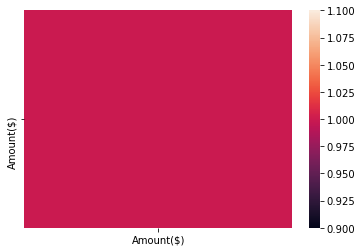

In [153]:
#Heat map showing correlation between all numerical columns 
sns.heatmap(startup_dataset.corr())

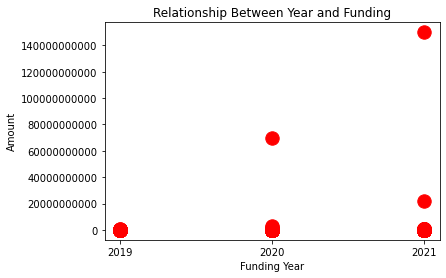

In [154]:
#Plotting a scatter plot of Company age by Funds received 

Funding_Year = startup_dataset['Funding Year'].astype(str)
Amount = startup_dataset['Amount($)']

plt.xlabel('Funding Year')
plt.ylabel('Amount')
plt.title('Relationship Between Year and Funding')

plt.ticklabel_format(style='plain')  # Display y-axis values in full figures

plt.scatter(Funding_Year, Amount, color='red', alpha=1, s=180)
plt.show()

# Answering the questions.

### 1. Which company received the most funding?

In [155]:
startup_dataset.sort_values(['Amount($)'], ascending = False, inplace=True)
startup_dataset.head(10)

,Company/Brand,Founded,HeadQuarter,Sector,Founders,Investor,Amount($),Stage,Funding Year
73,Alteria Capital,2018,Mumbai,Technology,Vinod Murali,NaN,1.500000e+11,Debt,2021
280,Reliance Retail Ventures Ltd,2006,Mumbai,Services,Mukesh Ambani,"Silver Lake, Mubadala Investment Company",7.000000e+10,NaN,2020
242,Fullife Healthcare,2009,NaN,N/A,Morgan Stanley Private Equity Asia,NaN,2.200000e+10,Series C,2021
317,Snowflake,2012,California,N/A,"Benoit Dageville, Bob Muglia, Marcin Zukowski,...","Salesforce Ventures, Dragoneer Investment Group",3.000000e+09,NaN,2020
328,Reliance,1973,Mumbai,N/A,Dhirubhai Ambani,"Facebook, Google, KKR, Silver Lake",2.200000e+09,NaN,2020
346,VerSe Innovation,2007,Bangalore,Services,Virendra Gupta,"Canaan Valley Capital, Glade Brook Capital Par...",1.000000e+09,Series H,2021
935,Dream Sports,2008,Mumbai,Sports & Fitness,Harsh Jain,"Falcon Edge, DST Global, D1 Capital, Redbird C...",8.400000e+08,NaN,2021
53,Swiggy,2014,Bangalore,Food & Beverage,"Nandan Reddy, Rahul Jaimini, Sriharsha Majety","Carmignac, Falcon Edge Capital",8.000000e+08,NaN,2021
472,Eruditus,2010,Mumbai,N/A,"Chaitanya Kalipatnapu, Ashwin Damera","Bertelsmann India Investments, Sequoia Capital...",8.000000e+08,NaN,2020
302,Reliance Retail Ventures,2006,Mumbai,Digital_Platform,Mukesh Ambani,"General Atlantic, Kohlberg Kravis Roberts",8.000000e+08,NaN,2020


<BarContainer object of 10 artists>

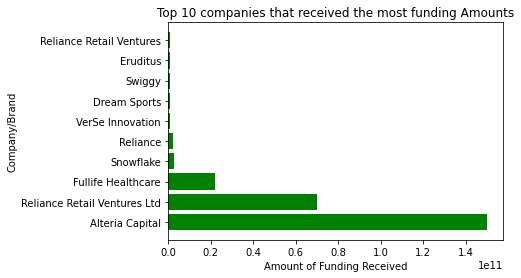

In [156]:
Company = startup_dataset['Company/Brand'].head(10)
Amount = startup_dataset['Amount($)'].head(10)
plt.xlabel('Amount of Funding Received')
plt.ylabel('Company/Brand')
plt.title('Top 10 companies that received the most funding Amounts')
plt.barh(Company, Amount, color='Green')

#### From the above, the company that received the highest fund is Alteria Capital with an amount of  $150 billion

### 2. Which company received the lowest amount of funding?

In [157]:
startup_dataset.sort_values(['Amount($)'], ascending = False, inplace=True)
startup_dataset.tail(10)

,Company/Brand,Founded,HeadQuarter,Sector,Founders,Investor,Amount($),Stage,Funding Year
93,GetWork,2019,Gurugram,N/A,Rahul Veerwal,India Accelerator,40000.00,Pre-Seed,2020
1007,Karfa,NaN,New Delhi,N/A,Kartikeya Goel,Undisclosed,25000.00,Seed,2020
354,Fasal,2018,Bangalore,Agriculture,"Ananda Prakash Verma, Shailendra Tiwari","Omnivore, Zeroth.AI",20000.00,NaN,2020
941,Krimanshi,NaN,Jodhpur,N/A,Nikhil Bohra,Arunachal Pradesh Social Entrepreneurship Meet,20000.00,NaN,2020
1002,Teach Us,NaN,NaN,Technology,NaN,Angel investors,12700.00,Seed,2020
1000,Medicus,NaN,Mumbai,Health,"Bhavesh Shah, Manav Shah",Angel investors,12700.00,NaN,2020
1001,Monech,NaN,Mumbai,N/A,NaN,Angel investors,12700.00,Seed,2020
308,Glii,2020,Noida,N/A,Shivam Kaushik,We Founder Circle,10000.00,Seed,2021
834,Peel Works,2010,Mumbai,N/A,"Sachin Chhabra, Nidhi Ramachandran",CESC Ventures,42.23,Series C,2020
552,SATYA Microcapital,1995,New Delhi,N/A,Vivek Tiwari,BlueOrchard Finance Limited,9.60,NaN,2020


<BarContainer object of 10 artists>

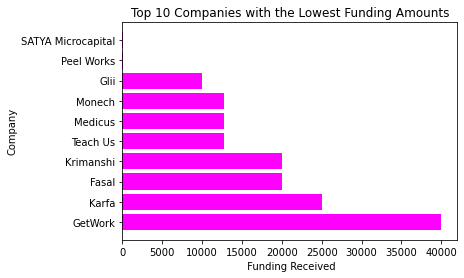

In [158]:
Company = startup_dataset['Company/Brand'].tail(10)
Amount = startup_dataset['Amount($)'].tail(10)
plt.xlabel(' Funding Received')
plt.ylabel('Company')
plt.title('Top 10 Companies with the Lowest Funding Amounts')
plt.barh(Company, Amount, color='magenta')

#### SATYA Microcapital received the least amount of funding

### 3. Which Sector received the highest amount of funding?

In [159]:
# Sort and group the funds received by sector in descending order

Amount_sum = startup_dataset.groupby(['Sector'])['Amount($)'].sum().reset_index()
Amount_sum.sort_values(['Amount($)'], ascending = False, inplace=True)
Amount_sum

,Sector,Amount($)
30,Technology,1.793420e+11
27,Services,7.406767e+10
25,N/A,5.340458e+10
15,Health,9.568998e+09
21,Manufacturing,4.510769e+09
4,Banking & Finance,3.691181e+09
23,Media & Entertainment,3.590615e+09
13,Food & Beverage,3.547232e+09
14,Food & Beverages,2.061480e+09
9,Digital_Platform,1.905951e+09


<BarContainer object of 10 artists>

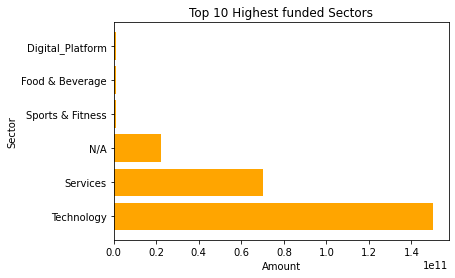

In [172]:
 Industry = startup_dataset['Sector'].head(10)
Amount = startup_dataset['Amount($)'].head(10)
plt.xlabel('Amount')
plt.ylabel('Sector')
plt.title('Top 10 Highest funded Sectors')
plt.barh(Industry, Amount, color='Orange')

#### The most funded sector  is Technology sector with sum amount of $179.342 billion 

### 4. Which Sector received the lowest amount of funding?


In [160]:
Value_sum = startup_dataset.groupby(['Sector'])['Amount($)'].sum().reset_index()
Value_sum.sort_values(['Amount($)'], ascending = True, inplace=True)
Value_sum

,Sector,Amount($)
6,Construction,3.300000e+06
22,Marketing,1.950000e+07
26,Others,2.720000e+07
31,Tourism,1.142089e+08
0,Accounting,1.230000e+08
24,Music,1.944202e+08
17,Housing,1.947762e+08
19,Legal,2.314178e+08
8,Data_Science_ Analytics,2.316178e+08
18,Insurance,2.929678e+08


<BarContainer object of 10 artists>

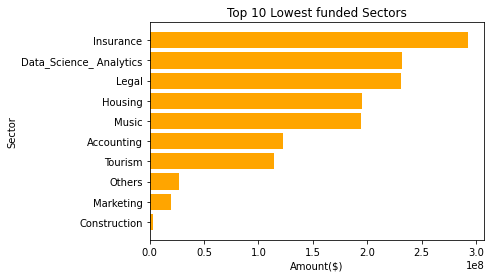

In [161]:
Industry = Value_sum['Sector'].head(10)
Amount = Value_sum['Amount($)'].head(10)
plt.xlabel('Amount($)')
plt.ylabel('Sector')
plt.title('Top 10 Lowest funded Sectors')
plt.barh(Industry, Amount, color='Orange')

#### The least funded sector is Construction, and it has received a sum of $ 3.3 million

### 5. Which HeadQuarters recorded the highest amount of funding received?

In [162]:
startup_dataset.sort_values(['Amount($)'], ascending = False, inplace=True)
startup_dataset.head(10)

,Company/Brand,Founded,HeadQuarter,Sector,Founders,Investor,Amount($),Stage,Funding Year
73,Alteria Capital,2018,Mumbai,Technology,Vinod Murali,NaN,1.500000e+11,Debt,2021
280,Reliance Retail Ventures Ltd,2006,Mumbai,Services,Mukesh Ambani,"Silver Lake, Mubadala Investment Company",7.000000e+10,NaN,2020
242,Fullife Healthcare,2009,NaN,N/A,Morgan Stanley Private Equity Asia,NaN,2.200000e+10,Series C,2021
317,Snowflake,2012,California,N/A,"Benoit Dageville, Bob Muglia, Marcin Zukowski,...","Salesforce Ventures, Dragoneer Investment Group",3.000000e+09,NaN,2020
328,Reliance,1973,Mumbai,N/A,Dhirubhai Ambani,"Facebook, Google, KKR, Silver Lake",2.200000e+09,NaN,2020
346,VerSe Innovation,2007,Bangalore,Services,Virendra Gupta,"Canaan Valley Capital, Glade Brook Capital Par...",1.000000e+09,Series H,2021
935,Dream Sports,2008,Mumbai,Sports & Fitness,Harsh Jain,"Falcon Edge, DST Global, D1 Capital, Redbird C...",8.400000e+08,NaN,2021
53,Swiggy,2014,Bangalore,Food & Beverage,"Nandan Reddy, Rahul Jaimini, Sriharsha Majety","Carmignac, Falcon Edge Capital",8.000000e+08,NaN,2021
472,Eruditus,2010,Mumbai,N/A,"Chaitanya Kalipatnapu, Ashwin Damera","Bertelsmann India Investments, Sequoia Capital...",8.000000e+08,NaN,2020
302,Reliance Retail Ventures,2006,Mumbai,Digital_Platform,Mukesh Ambani,"General Atlantic, Kohlberg Kravis Roberts",8.000000e+08,NaN,2020


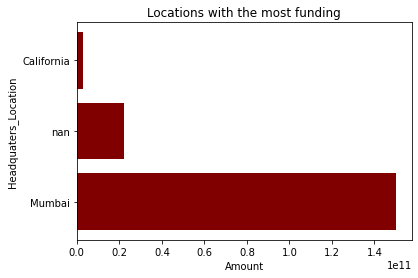

In [163]:
# Extracting the top 10 Headquarter locations and corresponding funding amount
Headquaters_Location = startup_dataset['HeadQuarter'].head().astype(str)
Amount = startup_dataset['Amount($)'].head()
# Creating the bar chart
plt.xlabel('Amount')
plt.ylabel('Headquaters_Location')
plt.title('Locations with the most funding')
plt.barh(Headquaters_Location, Amount, color='maroon')
plt.show()


#### Companies in Mumbai have the received highest sum of funds.


### 6. What is the total amount funding received each year?

In [164]:
amtby_year=startup_dataset.groupby(['Funding Year']).sum(numeric_only=True).reset_index()
amtby_year = amtby_year.reindex([2, 0, 1])
amtby_year

,Funding Year,Amount($)
2,2021,2.284825e+11
0,2020,1.188210e+11
1,2019,3.856397e+09


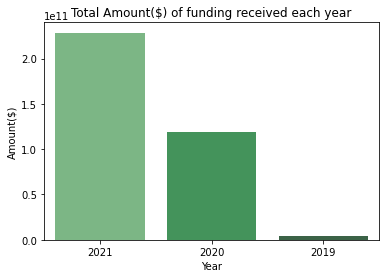

In [165]:
plt.title('Total Amount($) of funding received each year')
ax=sns.barplot(y=amtby_year['Amount($)'],x=amtby_year['Funding Year'],palette='Greens_d')
ax.set(xlabel='Year',ylabel='Amount($)')
plt.show()

#### The total amounts received each year in 2019, 2020 and 2021 are  3,856.397 million, 118,821 million,  and 228,482.5 million Dollars respectively. 2021 was the best year for funding

### 7. What is the average amount received in 2019, 2020 and 2021

In [166]:
mean_amount_per_year = startup_dataset.groupby('Funding Year')['Amount($)'].mean()
mean_amount_per_year

Funding Year
2020    1.130551e+08
2019    4.333030e+07
2021    1.921636e+08
Name: Amount($), dtype: float64

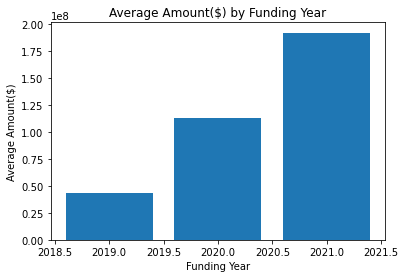

In [167]:
# Group the dataset by 'Funding Year' and calculate the mean 'Amount($)' for each year
mean_amount_by_year = startup_dataset.groupby('Funding Year')['Amount($)'].mean()

# Convert the 'Funding Year' values to numeric data type
mean_amount_by_year.index = pd.to_numeric(mean_amount_by_year.index)

# Create a bar chart
plt.bar(mean_amount_by_year.index, mean_amount_by_year)

# Customize the plot
plt.title('Average Amount($) by Funding Year')
plt.xlabel('Funding Year')
plt.ylabel('Average Amount($)')

# Display the plot
plt.show()

#### The Average amounts received in 2019, 2020 and 2021 are 113.0551 million, 43.3303 million and 192.1636 million respectively.

### 8. At what stage do startups receive the most funding?

In [168]:
# Group the data by stage and calculate the total funding amount for each stage
funding_by_stage = startup_dataset.groupby('Stage')['Amount($)'].sum()

# Sort the stages in descending order of funding amount and select the top 10 stages
top_10_stages = funding_by_stage.sort_values(ascending=False).head(10)

# Print the top 10 stages and their corresponding total funding amounts
for stage, funding in top_10_stages.items():
    print("Stage:", stage)
    print("Total Funding Amount:", funding)
    print()

Stage: Debt
Total Funding Amount: 150587432000.0

Stage: Series C
Total Funding Amount: 26632213619.126938

Stage: Seed
Total Funding Amount: 14708562566.166912

Stage: Pre-series A
Total Funding Amount: 4013968550.0476656

Stage: Pre-Series A
Total Funding Amount: 3888658337.598996

Stage: Series B
Total Funding Amount: 3597398679.494342

Stage: Series E
Total Funding Amount: 3407723186.844614

Stage: Series D
Total Funding Amount: 3348370000.0

Stage: Series A
Total Funding Amount: 3326792571.3293104

Stage: Pre-seed
Total Funding Amount: 1947641868.4461393



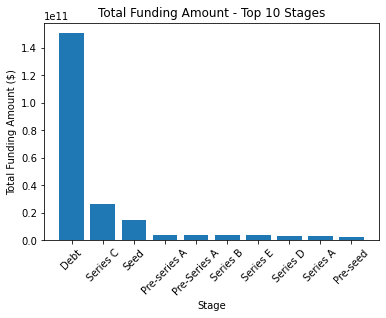

In [169]:

# Group the data by stage and calculate the total funding amount for each stage
funding_by_stage = startup_dataset.groupby('Stage')['Amount($)'].sum()

# Select the top 10 stages by funding amount
top_10_stages = funding_by_stage.nlargest(10)

# Create a bar chart
plt.bar(top_10_stages.index, top_10_stages)
plt.title('Total Funding Amount - Top 10 Stages')
plt.xlabel('Stage')
plt.ylabel('Total Funding Amount ($)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

#### The most prevalent funding option was Debt Finance

### 9. Does the location affect the funding received?

In [170]:
# Group the data by location and calculate the mean funding amount for each location
funding_by_location = startup_dataset.groupby('HeadQuarter')['Amount($)'].mean()

# Sort the locations in descending order of mean funding amount
sorted_locations = funding_by_location.sort_values(ascending=False)

# Print the top 10 locations with the highest mean funding amount
top_10_locations = sorted_locations.head(10)
print("Top 10 Locations with Highest Mean Funding Amount:")
print(top_10_locations)
print()

Top 10 Locations with Highest Mean Funding Amount:
HeadQuarter
Mumbai                6.395442e+08
California            6.383018e+08
Shanghai, China       4.000000e+08
Faridabad             2.200000e+08
Beijing               2.000000e+08
Mohali                1.921702e+08
Mangalore             1.921702e+08
Mountain View, CA     1.921702e+08
Roorkee               1.921702e+08
Thiruvananthapuram    1.921702e+08
Name: Amount($), dtype: float64



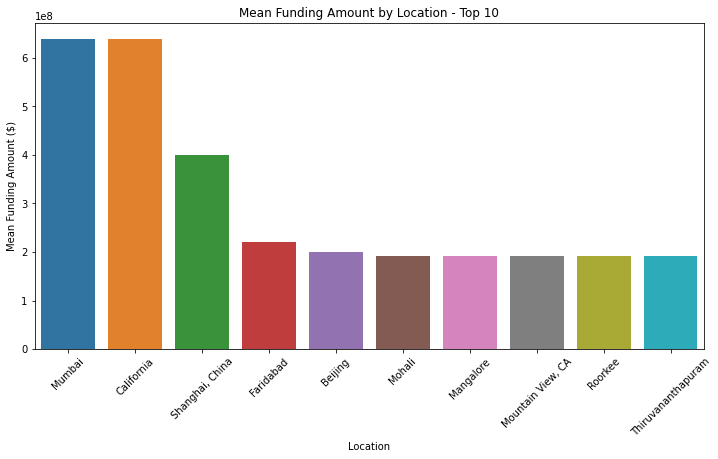

In [171]:

# Create a bar plot to visualize the mean funding amount by location
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_locations.index, y=top_10_locations.values)
plt.title('Mean Funding Amount by Location - Top 10')
plt.xlabel('Location')
plt.ylabel('Mean Funding Amount ($)')
plt.xticks(rotation=45)
plt.show()

#### Since there is a variation in the differences in the mean funding amounts represented by the heights of the bars among different locations, it suggests that location may have an impact on funding received.

# Conclusion

The Indian business scene is a budding one and it can clearly be seen that there is a lot of support for new ventures. It is an ideal place for any startup given that all factors are properly considered and analyzed. 